In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd 
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA
import sys
import scipy.stats as st
from scipy.stats import ks_2samp,bartlett,ttest_ind
import seaborn as sns

Importation des fichiers de données pour travaux

In [2]:

sys.path.append('../code')
print(sys.path)

['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/local/lib/python3.5/dist-packages/daemonocle-1.0.1-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/certifi-2018.1.18-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/click-6.7-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/setuptools-39.0.1-py3.5.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/silvock/.ipython', '../code']


In [3]:
import my_functions_revue as mfct

In [4]:
data = pd.read_csv('../fichiers_csv/population_2012.csv')

data2 = pd.read_csv('../fichiers_csv/df_base_projet3.csv')

# Mission 1 : Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

    Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.
    Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.
    Disponibilité alimentaire en protéines par habitant.
    Disponibilité alimentaire en calories par habitant.


## Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.

In [5]:
data.drop(['Code Domaine','Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code Année', 'Unité','Année'], axis=1, inplace=True)

In [6]:
data['Population 2012 en milliers'] = data['Valeur']
del data['Valeur']
data.head()

,Code Pays,Pays,Population 2012 en milliers
0,2,Afghanistan,29825
1,202,Afrique du Sud,52386
2,3,Albanie,3162
3,4,Algérie,38482
4,79,Allemagne,82800


In [7]:
data2.head()

,Code Pays,Pays,Année,Produit,Code Produit,Nature Produit,Aliments pour animaux (en milliers de tonnes),Autres Utilisations (en milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Semences (en milliers de tonnes),Traitement (en milliers de tonnes),Population totale (en milliers),Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (kg/an),ratio_energie_poids en Kcal/an,Nature Produit 2,Disponibilité de protéines en quantité (Kg/an),ratio_poids_proteines_poids_total_en_kg_an,Nature Produit 3
0,1,Arménie,2013,Abats Comestible,2736,autre,0.0,3.0,14.0,4.59,...,0.0,0.0,2977.0,15212470.0,13664.43,1113.289760,animal,2444.86125,0.178922,non viande
1,2,Afghanistan,2013,Abats Comestible,2736,autre,0.0,0.0,5.0,1.72,...,0.0,0.0,30552.0,55757400.0,52549.44,1061.046512,animal,8586.63960,0.163401,non viande
2,3,Albanie,2013,Abats Comestible,2736,autre,0.0,0.0,11.0,3.50,...,0.0,0.0,3173.0,12739595.0,11105.50,1147.142857,animal,1853.03200,0.166857,non viande
3,4,Algérie,2013,Abats Comestible,2736,autre,0.0,0.0,4.0,1.45,...,0.0,0.0,39208.0,57243680.0,56851.60,1006.896552,animal,9015.87960,0.158586,non viande
4,7,Angola,2013,Abats Comestible,2736,autre,0.0,0.0,3.0,1.15,...,0.0,0.0,21472.0,23511840.0,24692.80,952.173913,animal,4388.87680,0.177739,non viande


In [8]:






df_base = pd.merge(data,data2)
df_base

,Code Pays,Pays,Population 2012 en milliers,Année,Produit,Code Produit,Nature Produit,Aliments pour animaux (en milliers de tonnes),Autres Utilisations (en milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),...,Semences (en milliers de tonnes),Traitement (en milliers de tonnes),Population totale (en milliers),Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (kg/an),ratio_energie_poids en Kcal/an,Nature Produit 2,Disponibilité de protéines en quantité (Kg/an),ratio_poids_proteines_poids_total_en_kg_an,Nature Produit 3
0,2,Afghanistan,29825,2013,Abats Comestible,2736,autre,0.0,0.0,5.0,...,0.0,0.0,30552.0,5.575740e+07,5.254944e+04,1061.046512,animal,8.586640e+03,0.163401,non viande
1,2,Afghanistan,29825,2013,"Agrumes, Autres",2614,autre,0.0,0.0,1.0,...,0.0,0.0,30552.0,1.115148e+07,3.941208e+04,282.945736,végétal,2.230296e+02,0.005659,non viande
2,2,Afghanistan,29825,2013,Aliments pour enfants,2680,autre,0.0,0.0,1.0,...,0.0,0.0,30552.0,1.115148e+07,1.833120e+03,6083.333333,végétal,3.345444e+02,0.182500,non viande
3,2,Afghanistan,29825,2013,Ananas,2618,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande
4,2,Afghanistan,29825,2013,Bananes,2615,autre,0.0,0.0,4.0,...,0.0,0.0,30552.0,4.460592e+07,8.249040e+04,540.740741,végétal,5.575740e+02,0.006759,non viande
5,2,Afghanistan,29825,2013,"Beurre, Ghee",2740,autre,0.0,0.0,23.0,...,0.0,0.0,30552.0,2.564840e+08,3.574584e+04,7175.213675,animal,3.345444e+02,0.009359,non viande
6,2,Afghanistan,29825,2013,Bière,2656,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,2.749680e+03,0.000000,végétal,0.000000e+00,0.000000,non viande
7,2,Afghanistan,29825,2013,Blé,2511,céréales,0.0,0.0,1369.0,...,322.0,0.0,30552.0,1.526638e+10,4.895347e+06,3118.548337,végétal,4.116011e+05,0.084080,non viande
8,2,Afghanistan,29825,2013,Boissons Alcooliques,2658,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande
9,2,Afghanistan,29825,2013,Café,2630,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande


In [9]:
df_base['Evolution population 2012/2013 en pourcentage'] = (df_base['Population totale (en milliers)'] / df_base['Population 2012 en milliers'])*100-100 

In [10]:
df_base.columns

Index(['Code Pays', 'Pays', 'Population 2012 en milliers', 'Année', 'Produit',
       'Code Produit', 'Nature Produit',
       'Aliments pour animaux (en milliers de tonnes)',
       'Autres Utilisations (en milliers de tonnes)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure (en milliers de tonnes)',
       'Nourriture (en milliers de tonnes)', 'Pertes (en milliers de tonnes)',
       'Semences (en milliers de tonnes)',
       'Traitement (en milliers de tonnes)', 'Population totale (en milliers)',
       'Disponibilité alimentaire (Kcal/an)',
       'Disponibilité alimentaire en quantité (kg/an)',
       'ratio_energie_poids en Kcal/an', 'Nature Produit 2',
       'Disponibilité de protéines en quantité (Kg/an)',
       'ratio_poids_proteine

In [11]:
df_base.drop(['Population 2012 en milliers', 'Année', 'Aliments pour animaux (en milliers de tonnes)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité intérieure (en milliers de tonnes)','Nourriture (en milliers de tonnes)', 'Pertes (en milliers de tonnes)','Semences (en milliers de tonnes)','Traitement (en milliers de tonnes)', 'Population totale (en milliers)','Disponibilité alimentaire en quantité (kg/an)','ratio_energie_poids en Kcal/an','ratio_poids_proteines_poids_total_en_kg_an','Autres Utilisations (en milliers de tonnes)','Disponibilité alimentaire (Kcal/an)','Disponibilité de protéines en quantité (Kg/an)'], axis=1, inplace=True)
df_base

,Code Pays,Pays,Produit,Code Produit,Nature Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nature Produit 2,Nature Produit 3,Evolution population 2012/2013 en pourcentage
0,2,Afghanistan,Abats Comestible,2736,autre,5.0,0.77,animal,non viande,2.437552
1,2,Afghanistan,"Agrumes, Autres",2614,autre,1.0,0.02,végétal,non viande,2.437552
2,2,Afghanistan,Aliments pour enfants,2680,autre,1.0,0.03,végétal,non viande,2.437552
3,2,Afghanistan,Ananas,2618,autre,0.0,0.00,végétal,non viande,2.437552
4,2,Afghanistan,Bananes,2615,autre,4.0,0.05,végétal,non viande,2.437552
5,2,Afghanistan,"Beurre, Ghee",2740,autre,23.0,0.03,animal,non viande,2.437552
6,2,Afghanistan,Bière,2656,autre,0.0,0.00,végétal,non viande,2.437552
7,2,Afghanistan,Blé,2511,céréales,1369.0,36.91,végétal,non viande,2.437552
8,2,Afghanistan,Boissons Alcooliques,2658,autre,0.0,0.00,végétal,non viande,2.437552
9,2,Afghanistan,Café,2630,autre,0.0,0.00,végétal,non viande,2.437552


## Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.

In [12]:
df_prot_anim = df_base[df_base['Nature Produit 2']== 'animal']
df_prot_anim
df_prot_anim_par_pays = df_prot_anim.groupby(['Code Pays','Pays','Evolution population 2012/2013 en pourcentage']).sum().reset_index()
df_prot_anim_par_pays.drop(['Evolution population 2012/2013 en pourcentage', 'Code Produit', 'Disponibilité alimentaire (Kcal/personne/jour)'], axis=1, inplace=True)


In [13]:
df_prot_anim_par_pays['Disponibilité de protéines origine animale en quantité (g/personne/jour)'] = df_prot_anim_par_pays['Disponibilité de protéines en quantité (g/personne/jour)']
del df_prot_anim_par_pays['Disponibilité de protéines en quantité (g/personne/jour)']

df_prot_anim_par_pays

,Code Pays,Pays,Disponibilité de protéines origine animale en quantité (g/personne/jour)
0,1,Arménie,43.34
1,2,Afghanistan,12.23
2,3,Albanie,59.54
3,4,Algérie,25.04
4,7,Angola,18.48
5,8,Antigua-et-Barbuda,57.10
6,9,Argentine,66.93
7,10,Australie,72.10
8,11,Autriche,62.96
9,12,Bahamas,58.15


In [14]:
df_base = df_base.groupby(['Code Pays', 'Pays','Evolution population 2012/2013 en pourcentage']).sum().reset_index()
del df_base['Code Produit']

In [15]:
df_base

,Code Pays,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,0.269451,2924.0,90.06
1,2,Afghanistan,2.437552,2087.0,58.26
2,3,Albanie,0.347881,3188.0,111.37
3,4,Algérie,1.886596,3293.0,91.92
4,7,Angola,3.126651,2474.0,57.27
5,8,Antigua-et-Barbuda,1.123596,2416.0,83.49
6,9,Argentine,0.873756,3226.0,102.60
7,10,Australie,1.271150,3278.0,106.26
8,11,Autriche,0.366257,3770.0,106.20
9,12,Bahamas,1.344086,2670.0,86.16


In [16]:
df_base = pd.merge(df_prot_anim_par_pays,df_base)
df_base

,Code Pays,Pays,Disponibilité de protéines origine animale en quantité (g/personne/jour),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,43.34,0.269451,2924.0,90.06
1,2,Afghanistan,12.23,2.437552,2087.0,58.26
2,3,Albanie,59.54,0.347881,3188.0,111.37
3,4,Algérie,25.04,1.886596,3293.0,91.92
4,7,Angola,18.48,3.126651,2474.0,57.27
5,8,Antigua-et-Barbuda,57.10,1.123596,2416.0,83.49
6,9,Argentine,66.93,0.873756,3226.0,102.60
7,10,Australie,72.10,1.271150,3278.0,106.26
8,11,Autriche,62.96,0.366257,3770.0,106.20
9,12,Bahamas,58.15,1.344086,2670.0,86.16


In [17]:
df_base["Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)"]= (df_base['Disponibilité de protéines origine animale en quantité (g/personne/jour)']/df_base['Disponibilité de protéines en quantité (g/personne/jour)'])*100

In [18]:
df_base.drop(['Disponibilité de protéines origine animale en quantité (g/personne/jour)'], axis=1, inplace=True)

In [19]:
df_base

,Code Pays,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,1,Arménie,0.269451,2924.0,90.06,48.123473
1,2,Afghanistan,2.437552,2087.0,58.26,20.992104
2,3,Albanie,0.347881,3188.0,111.37,53.461435
3,4,Algérie,1.886596,3293.0,91.92,27.241079
4,7,Angola,3.126651,2474.0,57.27,32.268203
5,8,Antigua-et-Barbuda,1.123596,2416.0,83.49,68.391424
6,9,Argentine,0.873756,3226.0,102.60,65.233918
7,10,Australie,1.271150,3278.0,106.26,67.852437
8,11,Autriche,0.366257,3770.0,106.20,59.284369
9,12,Bahamas,1.344086,2670.0,86.16,67.490715


# Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

In [20]:
df_base.index = df_base['Pays']
del df_base['Pays']
del df_base['Code Pays']

## Visualisation des 5 groupes

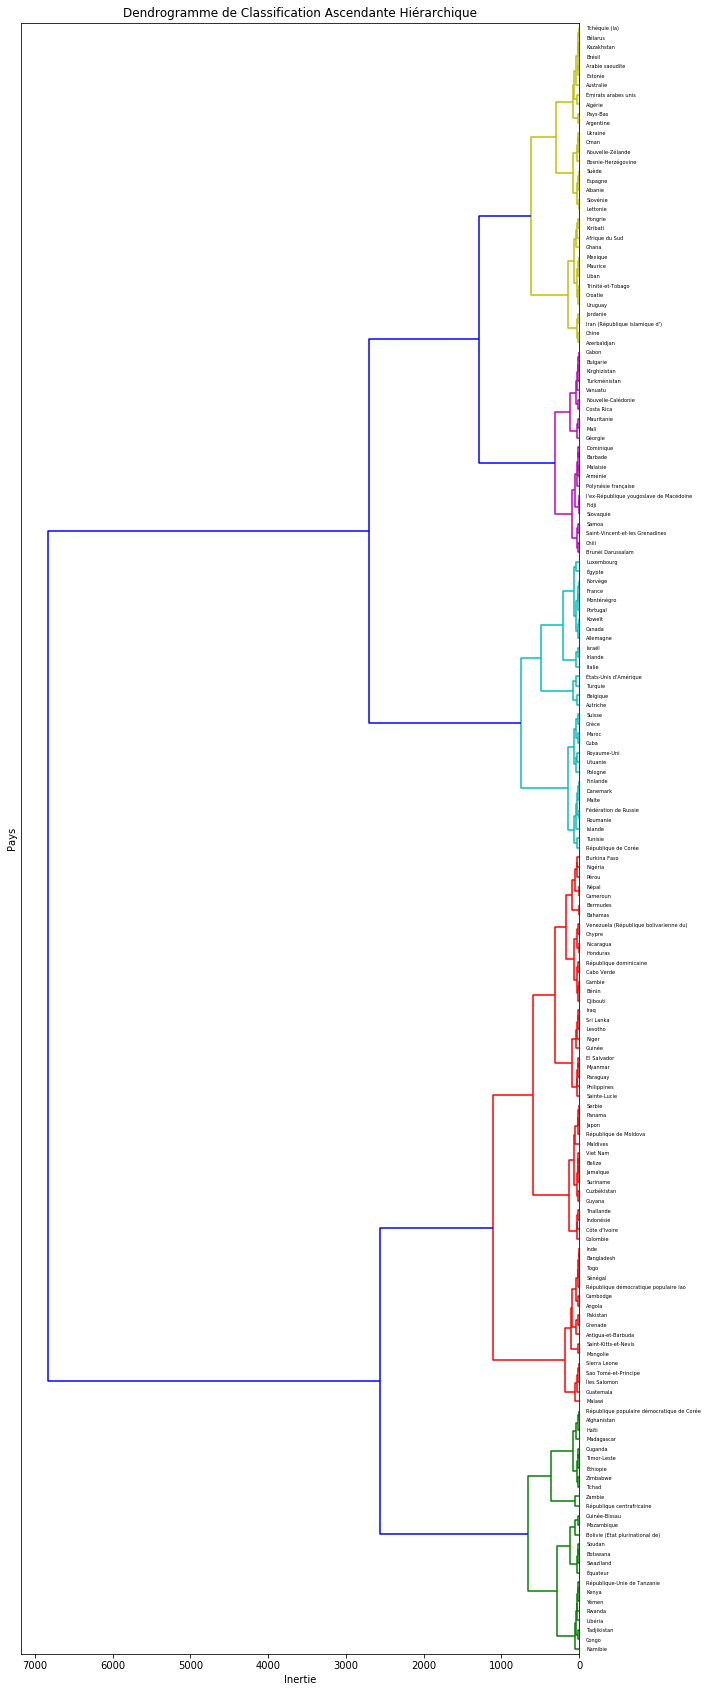

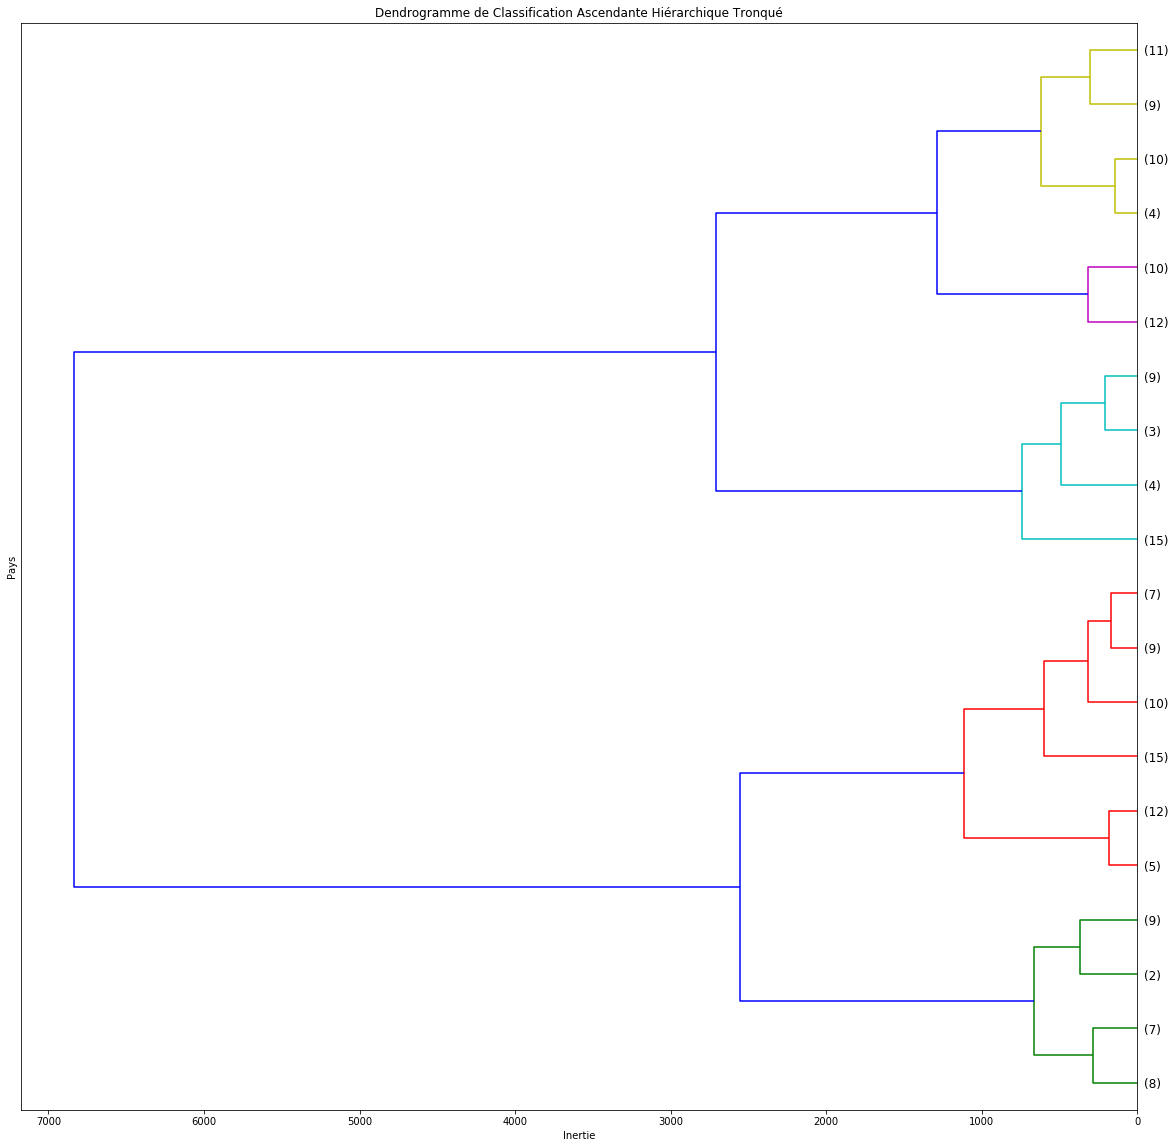

In [21]:

X = df_base.values 
#Y = ssd.pdist(X) #Ne prend pas de str
Z = sch.linkage(X,method='ward',metric='euclidean')
#La méthode de Ward consiste à regrouper les classes de façon que l'augmentation de ...
#...l'inertie interclasse soit maximum, ou ce qui revient au même d'après le théorème de Huygens,..
#...de façon que l'augmentation de l'inertie intraclasse soit minimum

fig =plt.figure(figsize=(10,30))
plt.title('Dendrogramme de Classification Ascendante Hiérarchique')
plt.xlabel("Inertie")
plt.ylabel('Pays')
entire_dendro = sch.dendrogram(Z,labels = df_base.index,color_threshold=1200, orientation='left')
plt.show(entire_dendro)


fig.savefig('../presentation/images/Dendrogramme_de_Classification_Ascendante_Hiérarchique')

fig2 =plt.figure(figsize=(20,20))
plt.title('Dendrogramme de Classification Ascendante Hiérarchique Tronqué')
plt.xlabel("Inertie")
plt.ylabel('Pays')
truncate_dendro = sch.dendrogram(Z,labels = df_base.index,color_threshold=1200, orientation='left', p=20, truncate_mode='lastp')
plt.show(truncate_dendro)

fig2.savefig('../presentation/images/Dendrogramme_de_Classification_Ascendante_Hiérarchique_Tronqué')

## Choix du nombre de groupe (les 3 règles)
1- Le nombre de groupe doit être cohérent d’un point de vue métier. C’est l’interprétation des résultats qui vous permettra de vérifier que vos groupes ont du sens. <br/>
2- Le nombre de groupe doit être exploitable : une segmentation de 8 groupes ça commence déjà à faire beaucoup pour une exploitation opérationnelle.<br/>
3- Les groupes doivent être le plus homogènes possible (les individus d’un groupe se ressemblent et les groupes sont différents les uns des autres). Cela se traduit, sur le dendrogramme, par le fait de couper au niveau d’une branche « longue »

# Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

## Caractérisez chacun de ces groupes selon les variables cités précédemment

Caratérisez chacun des groupes = Analyse Univarié ou Bivarié pour chacun des groupes pour trouver des critéres de distinctions

### Decoupage en classes - Matérialisation des groupes

In [22]:
#découpage á la hauteur t=46 --> identifiants de 5 groupes
groupes_cah = sch.fcluster(Z,t=1200,criterion='distance')
print(groupes_cah)



[4 1 5 5 2 2 5 5 3 2 4 2 2 1 1 5 2 2 4 4 2 2 3 2 1 2 1 4 2 1 4 3 2 5 2 3 4
 2 5 1 3 2 5 4 3 3 4 2 4 4 2 3 5 5 5 3 2 2 2 2 1 2 5 5 3 2 2 5 2 3 3 3 2 5
 2 2 5 4 1 2 1 3 3 5 2 5 2 1 3 1 2 4 2 4 3 4 5 5 2 3 1 2 1 2 5 4 4 4 5 2 2
 2 3 2 2 5 2 2 2 3 3 1 1 1 3 1 3 2 2 4 2 5 2 2 5 4 5 5 2 1 1 5 3 4 1 2 2 5
 5 3 3 5 1 3 5 3 2 5 2 2 2 1 4 1 1 3 3 2 3 1 5]


In [23]:
#index triés des groupes
idg = np.argsort(groupes_cah)

In [24]:
#affichage des observations et leurs groupes
df_groupes_cah = pd.DataFrame(df_base.index[idg],groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'groupe_cah'})
print(df_groupes_cah)

     groupe_cah                                        Pays
0             1                                    Éthiopie
1             1                                  Madagascar
2             1                               Guinée-Bissau
3             1                                     Ouganda
4             1                                 Timor-Leste
5             1                                    Équateur
6             1                                    Zimbabwe
7             1                                      Rwanda
8             1                                       Yémen
9             1                                       Haïti
10            1                                     Libéria
11            1                                       Congo
12            1                                       Tchad
13            1                                   Swaziland
14            1                                      Zambie
15            1                   Républ

In [25]:
#Réindexation df_base pour jointure
df_base.reset_index(inplace=True)

In [26]:
joint_df_base_cah_group = pd.merge(df_groupes_cah,df_base)
joint_df_base_cah_group

,groupe_cah,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,1,Éthiopie,2.585878,2129.0,60.39,12.733896
1,1,Madagascar,2.830358,2056.0,46.69,21.503534
2,1,Guinée-Bissau,2.403846,2288.0,44.05,20.408627
3,1,Ouganda,3.392395,2126.0,52.64,23.537234
4,1,Timor-Leste,1.705566,2129.0,57.51,31.333681
5,1,Équateur,1.587916,2346.0,61.30,59.624796
6,1,Zimbabwe,3.104051,2113.0,48.32,24.482616
7,1,Rwanda,2.784081,2224.0,56.79,9.860891
8,1,Yémen,2.326849,2217.0,58.90,23.684211
9,1,Haïti,1.405544,2089.0,47.70,21.299790


### Construction des dataframes de chaque groupe

In [27]:
df_groupe1 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==1]
df_groupe2 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==2]
df_groupe3 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==3]
df_groupe4 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==4]
df_groupe5 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==5]

### Analyse univariée

#### Groupe 1

In [86]:
mfct.analyse_univarie(df_groupe1,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

KeyboardInterrupt: 

In [ ]:
analyse_univarie(df_groupe1,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe1,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe1,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 2

In [ ]:
mfct.analyse_univarie(df_groupe2,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe2,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe2,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe2,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 3

In [ ]:
mfct.analyse_univarie(df_groupe3,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe3,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe3,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe3,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 4

In [ ]:
mfct.analyse_univarie(df_groupe4,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe4,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
analyse_univarie(df_groupe4,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe4,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 5

In [ ]:
mfct.analyse_univarie(df_groupe5,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe5,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe5,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe5,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

### Conclusion / Synthèse

#### Calcul des moyennes par groupe (centroïdes)

In [28]:
df_synthese_moyenne = joint_df_base_cah_group.groupby('groupe_cah').mean()
df_synthese_moyenne

,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
groupe_cah,,,,
1,2.282213,2173.576923,55.654231,27.232617
2,1.574862,2599.810345,70.381897,37.114192
3,0.653198,3481.967742,107.558065,53.689526
4,0.989683,2902.272727,83.527273,49.355988
5,1.064611,3151.470588,92.103529,49.429386


#### Tableau de centroïdes normé

In [29]:
df_centroid_norm_cah_ward_sans_pib = df_synthese_moyenne.copy()
total_tab = df_centroid_norm_cah_ward_sans_pib.sum().sum()
df_centroid_norm_cah_ward_sans_pib = df_centroid_norm_cah_ward_sans_pib/total_tab
df_centroid_norm_cah_ward_sans_pib


,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
groupe_cah,,,,
1,0.000153,0.145470,0.003725,0.001823
2,0.000105,0.173997,0.004710,0.002484
3,0.000044,0.233037,0.007199,0.003593
4,0.000066,0.194240,0.005590,0.003303
5,0.000071,0.210918,0.006164,0.003308


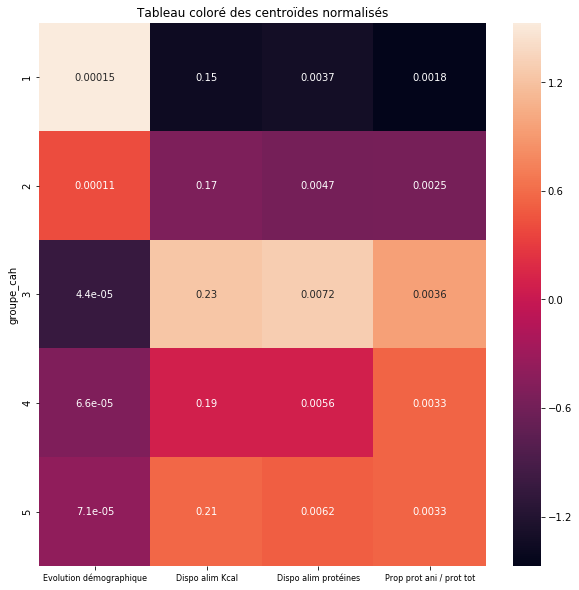

In [30]:
df_norm_col=(df_centroid_norm_cah_ward_sans_pib-df_centroid_norm_cah_ward_sans_pib.mean())/df_centroid_norm_cah_ward_sans_pib.std()
fig = plt.figure(figsize=(10,10))
plt.title('Tableau coloré des centroïdes normalisés')
plot = sns.heatmap(df_norm_col,annot=df_centroid_norm_cah_ward_sans_pib,xticklabels=['Evolution démographique','Dispo alim Kcal','Dispo alim protéines','Prop prot ani / prot tot'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, fontsize = 8)
fig.savefig('../presentation/images/tab_color_centroides_5_grp_sans_pib')

#### Calcule des écarts-type pour chacun des groupes

In [31]:
df_synthese_e_type = joint_df_base_cah_group.groupby('groupe_cah').std(ddof=0)
df_synthese_e_type

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Evolution population 2012/2013 en pourcentage,Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
groupe_cah,,,,
1,114.336270,7.681832,0.708901,11.840546
2,124.706201,11.799672,0.978651,16.245572
3,119.262650,9.139613,0.779381,11.755430
4,53.110675,6.871370,0.976111,9.284113
5,86.471769,10.456261,1.800735,11.891562


#### Pays a cibler 

In [32]:
df_groupe2

,groupe_cah,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
26,2,Guinée,2.567461,2567.0,55.86,17.848192
27,2,Guatemala,2.552543,2416.0,63.73,27.961713
28,2,Népal,1.175657,2672.0,68.99,16.640093
29,2,Pakistan,1.664992,2438.0,65.45,41.665393
30,2,Ouzbékistan,1.376966,2759.0,83.41,35.019782
31,2,Venezuela (République bolivarienne du),1.502253,2633.0,72.96,52.302632
32,2,Cambodge,1.816347,2473.0,65.66,29.165398
33,2,Grenade,0.952381,2442.0,69.20,60.173410
34,2,République de Moldova,-0.768355,2715.0,71.36,49.677691
35,2,Honduras,2.016129,2639.0,64.78,36.091386


Le groupe 2 semble interréssant car il conjugue des pays qui consomment en moyenne 37% de protéine animal par rapport aux quantités de protéines disponibles. L'évolution démographique est de 2 % en moyenne(futurs acheteurs).Compte tenu d'une plus faible disponibilité alimentaire par rapport au groupe 3, on peut émettre l'hypothèse que la concurrence sur les produits d'origine animale est encore moyenne. Nous allons rajouter la variable pib / habitant pour savoir si ces consommateurs potentiels peuvent devenir des acheteur.

##### Synthèse variable Dispo alimentaire

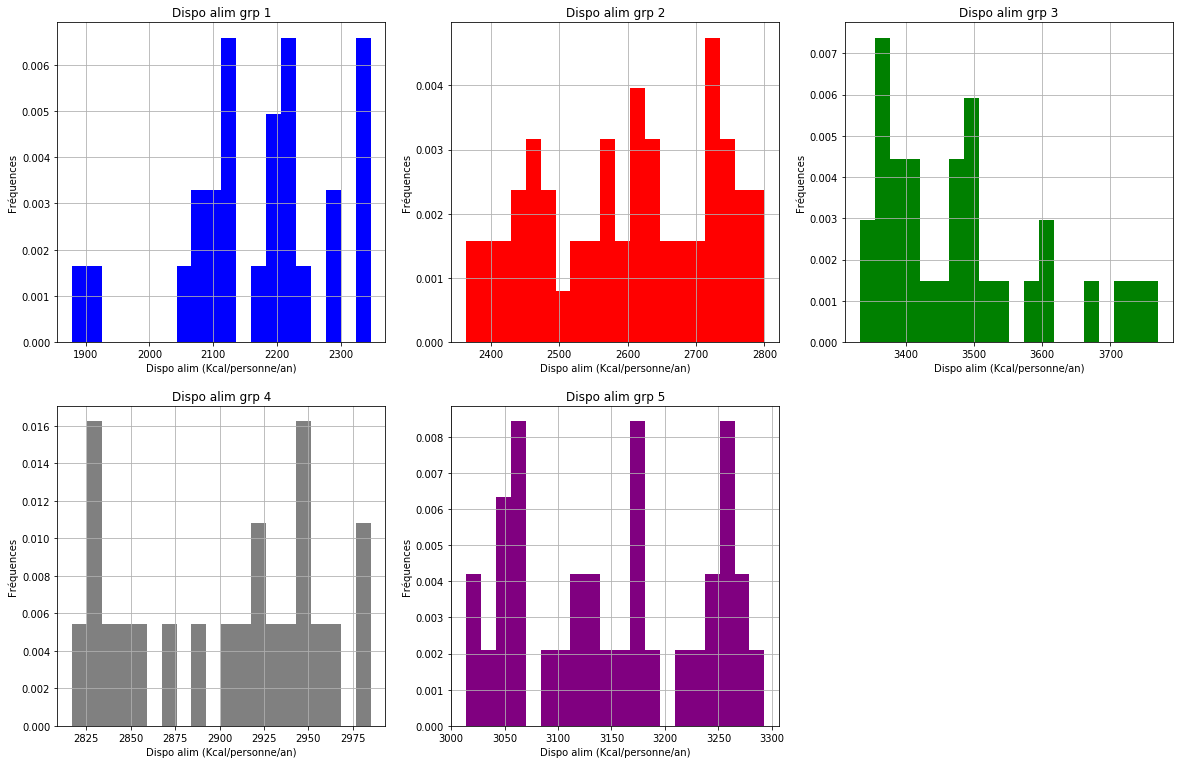

In [33]:
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Dispo alim grp 1')
plot_df_groupe1.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Dispo alim grp 2')
plot_df_groupe2.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Dispo alim grp 3')
plot_df_groupe3.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Dispo alim grp 4')
plot_df_groupe4.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Dispo alim grp 5')
plot_df_groupe5.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe5.set_ylabel('Fréquences')

fig3.savefig('../presentation/images/compare_dispo_alim_grp')

Le groupe 3 est le groupe qui la plus grande disponibilité alimentaire

##### Synthèse Disponibilité alimentaire en protéine

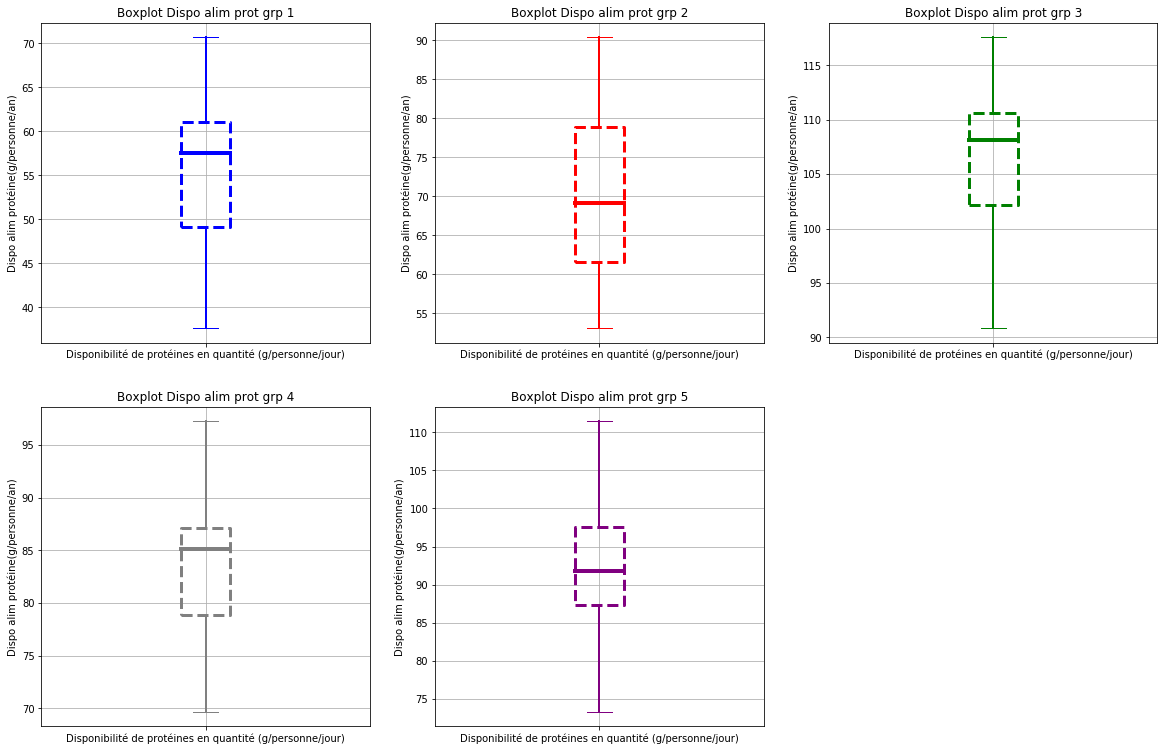

In [34]:
fig4 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Dispo alim prot grp 1')
plot_df_groupe1.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Dispo alim prot grp 2')
plot_df_groupe2.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Dispo alim prot grp 3')
plot_df_groupe3.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Dispo alim prot grp 4')
plot_df_groupe4.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Dispo alim prot grp 5')
plot_df_groupe5.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')
    
fig4.savefig('../presentation/images/compare_dispo_alim_prot_grp')

Le groupe 3 a la disponibilité alimentaire en protéine la plus forte

##### Synthèse Evolution population

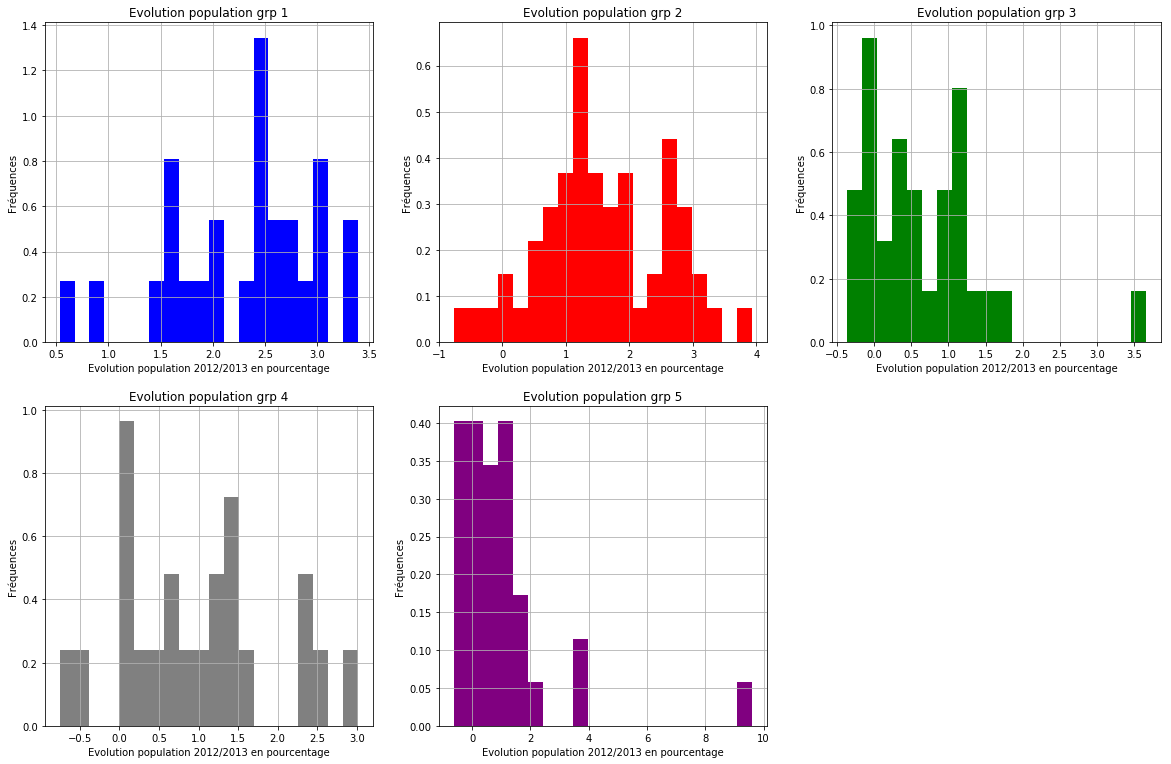

In [35]:
fig5 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Evolution population grp 1')
plot_df_groupe1.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Evolution population grp 2')
plot_df_groupe2.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Evolution population grp 3')
plot_df_groupe3.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Evolution population grp 4')
plot_df_groupe4.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Evolution population grp 5')
plot_df_groupe5.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe5.set_ylabel('Fréquences')

fig5.savefig('../presentation/images/compare_evolution_pop_grp')

Le groupe 5 a la plus forte croissance démographique

##### Synthèse proportion protéine animale dans disponibilité protéine totale

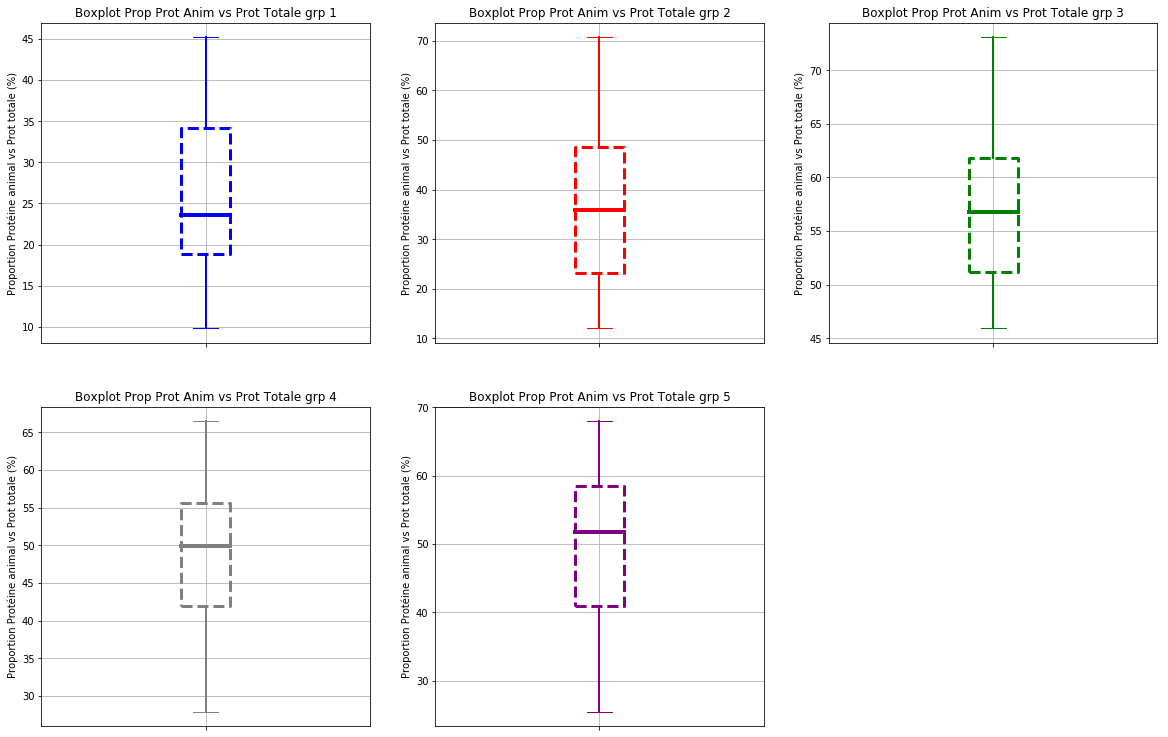

In [36]:
fig6 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 1')
plot_df_groupe1.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe1.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 2')
plot_df_groupe2.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe2.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 3')
plot_df_groupe3.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe3.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 4')
plot_df_groupe4.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe4.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 5')
plot_df_groupe5.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe5.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')
    
fig6.savefig('../presentation/images/compare_prop_prot_grp')

Le groupe 3 a la plus forte proportion de protéine animale par rapport la disponibilité de protéine totale

## Caractérisez chacun de ces groupes selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

### Ajout de la variable PIB par Habitant

In [37]:
df_base_cah_group=joint_df_base_cah_group.copy()
df_pib_habitant = pd.read_csv('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/fichiers_csv/pib_habitant_2013.csv')
df_pib_habitant = df_pib_habitant[['Zone','Valeur']] 
df_pib_habitant.columns =['Pays','PiB par habitant (PPA)']
# PPA =  méthode utilisée en économie pour établir une comparaison entre pays du pouvoir d'achat des devises nationales, ce qu’une simple utilisation des taux de change ne permet pas de faire.
df_base_cah_group_pib = pd.merge(df_pib_habitant,df_base_cah_group)
df_base_cah_group_pib

,Pays,PiB par habitant (PPA),groupe_cah,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,Afghanistan,1814.2,1,2.437552,2087.0,58.26,20.992104
1,Afrique du Sud,12445.6,5,0.744474,3020.0,85.33,42.646197
2,Albanie,10504.1,5,0.347881,3188.0,111.37,53.461435
3,Algérie,13253.2,5,1.886596,3293.0,91.92,27.241079
4,Allemagne,42914.5,3,-0.088164,3503.0,101.39,60.656870
5,Angola,6185.0,2,3.126651,2474.0,57.27,32.268203
6,Antigua-et-Barbuda,18862.8,2,1.123596,2416.0,83.49,68.391424
7,Arabie saoudite,49537.6,5,1.912472,3255.0,91.59,44.207883
8,Argentine,19482.2,5,0.873756,3226.0,102.60,65.233918
9,Arménie,7727.9,4,0.269451,2924.0,90.06,48.123473


In [38]:
df_base_pib = df_base_cah_group_pib.copy()
df_base_pib = df_base_pib.fillna(0)
df_base_pib.dropna(how = 'any')

df_base_pib.index = df_base_pib['Pays']
del df_base_pib['Pays']
del df_base_pib['groupe_cah']


In [39]:
df_base_pib

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
Pays,,,,,
Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
Albanie,10504.1,0.347881,3188.0,111.37,53.461435
Algérie,13253.2,1.886596,3293.0,91.92,27.241079
Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
Angola,6185.0,3.126651,2474.0,57.27,32.268203
Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
Argentine,19482.2,0.873756,3226.0,102.60,65.233918


### Calcul des centroïdes (Methode CAH)

In [40]:
X = pd.DataFrame(df_base_pib.values)


est = AgglomerativeClustering(n_clusters=5)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = df_base_pib.reset_index()
result_cah_5_grp = pd.concat([Y, Z], axis=1)
result_cah_5_grp.head(10)

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,2,Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
1,0,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
2,0,Albanie,10504.1,0.347881,3188.0,111.37,53.461435
3,0,Algérie,13253.2,1.886596,3293.0,91.92,27.241079
4,1,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
5,2,Angola,6185.0,3.126651,2474.0,57.27,32.268203
6,0,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
7,3,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
8,0,Argentine,19482.2,0.873756,3226.0,102.60,65.233918
9,2,Arménie,7727.9,0.269451,2924.0,90.06,48.123473


In [41]:
df_group_centroid_ward_5_grp = result_cah_5_grp.groupby('cluster ID').mean()

In [42]:
df_group_centroid_ward_5_grp

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
cluster ID,,,,,
0,16715.353968,0.771412,2966.492063,86.333968,48.922366
1,38275.204348,0.972785,3329.391304,104.214348,59.327149
2,3646.573684,1.913598,2539.447368,66.868816,30.675032
3,55466.733333,1.038192,3292.666667,99.916667,56.980949
4,81368.266667,2.087629,3341.333333,105.026667,57.218575


#### Tableau centroïdes normés CAH ward avec pib (5 grp)

In [43]:
df_group_centroid_ward_norm_5_grp = df_group_centroid_ward_5_grp.copy()
total_tab = df_group_centroid_ward_norm_5_grp.sum().sum()
df_group_centroid_ward_norm_5_grp = df_group_centroid_ward_norm_5_grp/total_tab
df_group_centroid_ward_norm_5_grp

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
cluster ID,,,,,
0,0.078971,0.000004,0.014015,0.000408,0.000231
1,0.180830,0.000005,0.015730,0.000492,0.000280
2,0.017228,0.000009,0.011998,0.000316,0.000145
3,0.262051,0.000005,0.015556,0.000472,0.000269
4,0.384422,0.000010,0.015786,0.000496,0.000270


#### Tableau coloré des centroides normalisés 

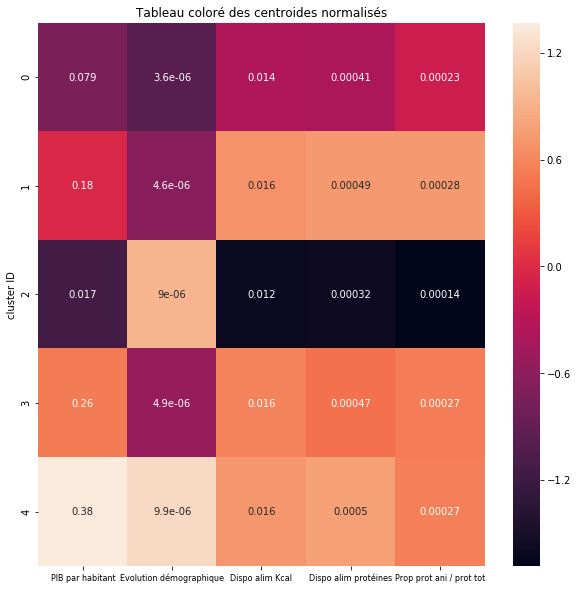

In [44]:
df_norm_col=(df_group_centroid_ward_norm_5_grp-df_group_centroid_ward_norm_5_grp.mean())/df_group_centroid_ward_norm_5_grp.std()
fig = plt.figure(figsize=(10,10))
plt.title('Tableau coloré des centroides normalisés')

plot = sns.heatmap(df_norm_col,annot=df_group_centroid_ward_norm_5_grp,xticklabels=['PIB par habitant','Evolution démographique','Dispo alim Kcal','Dispo alim protéines','Prop prot ani / prot tot'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, fontsize = 8)
fig.savefig('../presentation/images/tab_color_centroides_5_grp')

#### Caractéristiques de chaque groupe

In [45]:
df_groupe1 = result_cah_5_grp[result_cah_5_grp['cluster ID']==0]
df_groupe2 = result_cah_5_grp[result_cah_5_grp['cluster ID']==1]
df_groupe3 = result_cah_5_grp[result_cah_5_grp['cluster ID']==2]
df_groupe4 = result_cah_5_grp[result_cah_5_grp['cluster ID']==3]
df_groupe5 = result_cah_5_grp[result_cah_5_grp['cluster ID']==4]

##### Synthèse variable PIB par habitant

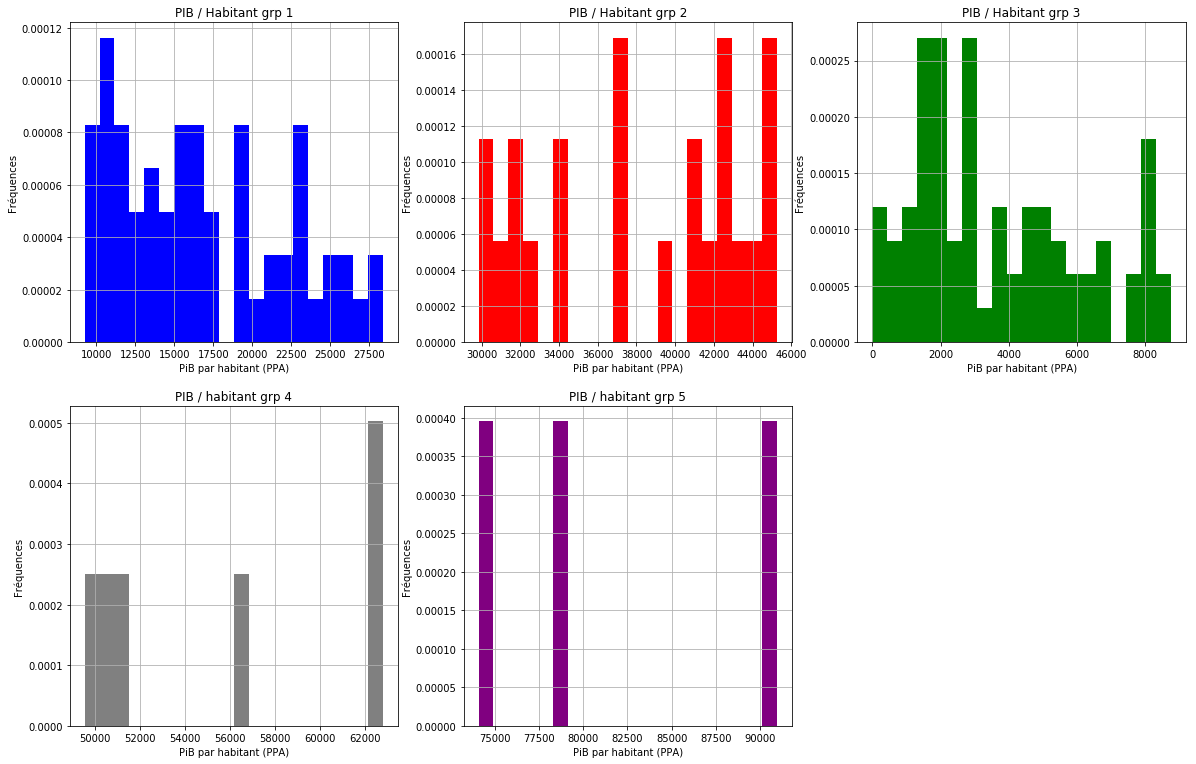

In [46]:
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['PiB par habitant (PPA)'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('PIB / Habitant grp 1')
plot_df_groupe1.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['PiB par habitant (PPA)'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('PIB / Habitant grp 2')
plot_df_groupe2.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['PiB par habitant (PPA)'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('PIB / Habitant grp 3')
plot_df_groupe3.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['PiB par habitant (PPA)'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('PIB / habitant grp 4')
plot_df_groupe4.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['PiB par habitant (PPA)'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('PIB / habitant grp 5')
plot_df_groupe5.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe5.set_ylabel('Fréquences')

fig3.savefig('../presentation/images/compare_pib_hab_grp')

##### Synthèse variable Dispo alimentaire

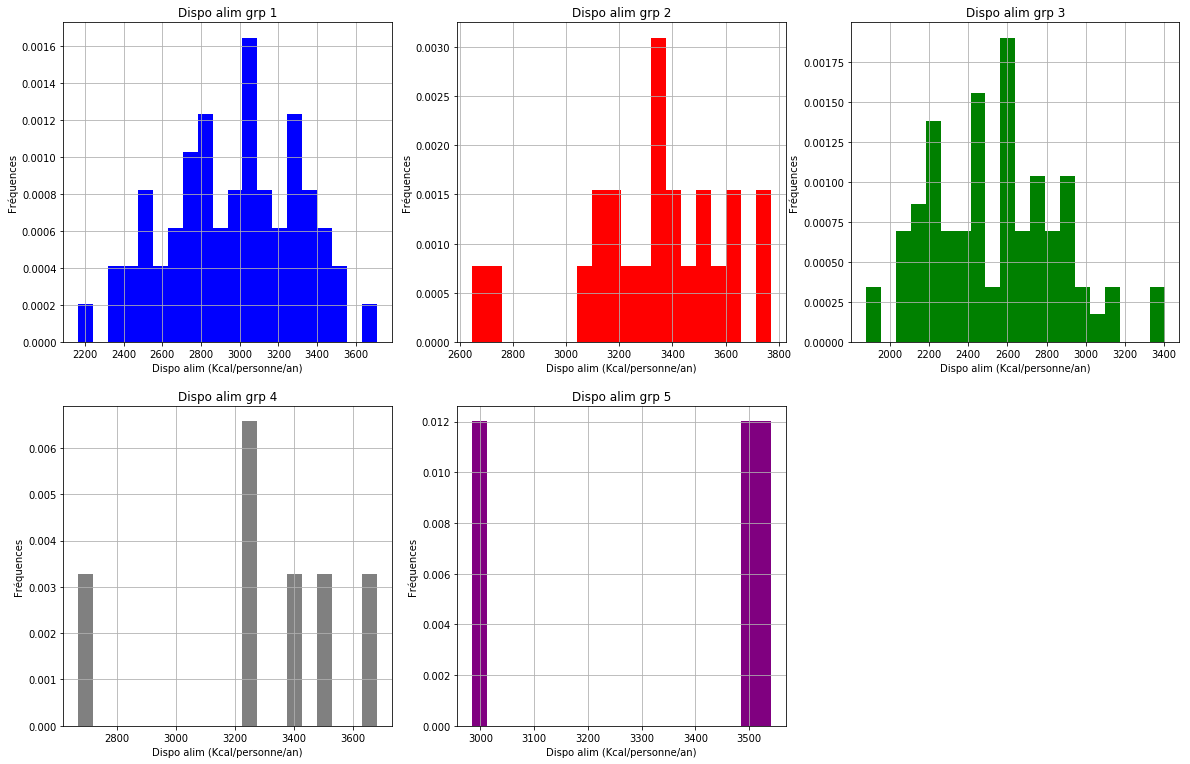

In [47]:
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Dispo alim grp 1')
plot_df_groupe1.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Dispo alim grp 2')
plot_df_groupe2.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Dispo alim grp 3')
plot_df_groupe3.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Dispo alim grp 4')
plot_df_groupe4.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Dispo alim grp 5')
plot_df_groupe5.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe5.set_ylabel('Fréquences')

fig3.savefig('../presentation/images/compare_dispo_alim_grp_pib')

##### Synthèse Disponibilité alimentaire en protéine

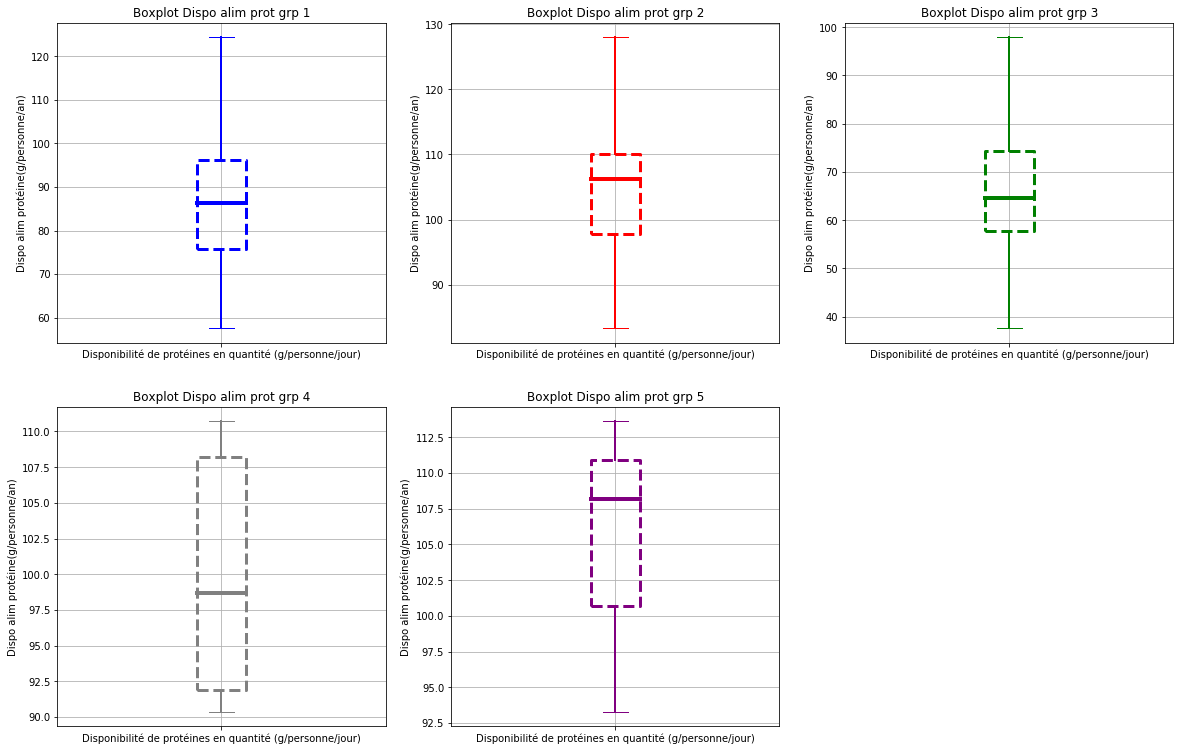

In [48]:
fig4 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Dispo alim prot grp 1')
plot_df_groupe1.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Dispo alim prot grp 2')
plot_df_groupe2.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Dispo alim prot grp 3')
plot_df_groupe3.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Dispo alim prot grp 4')
plot_df_groupe4.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Dispo alim prot grp 5')
plot_df_groupe5.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')
    
fig4.savefig('../presentation/images/compare_dispo_alim_prot_grp_pib')

##### Synthèse Evolution population

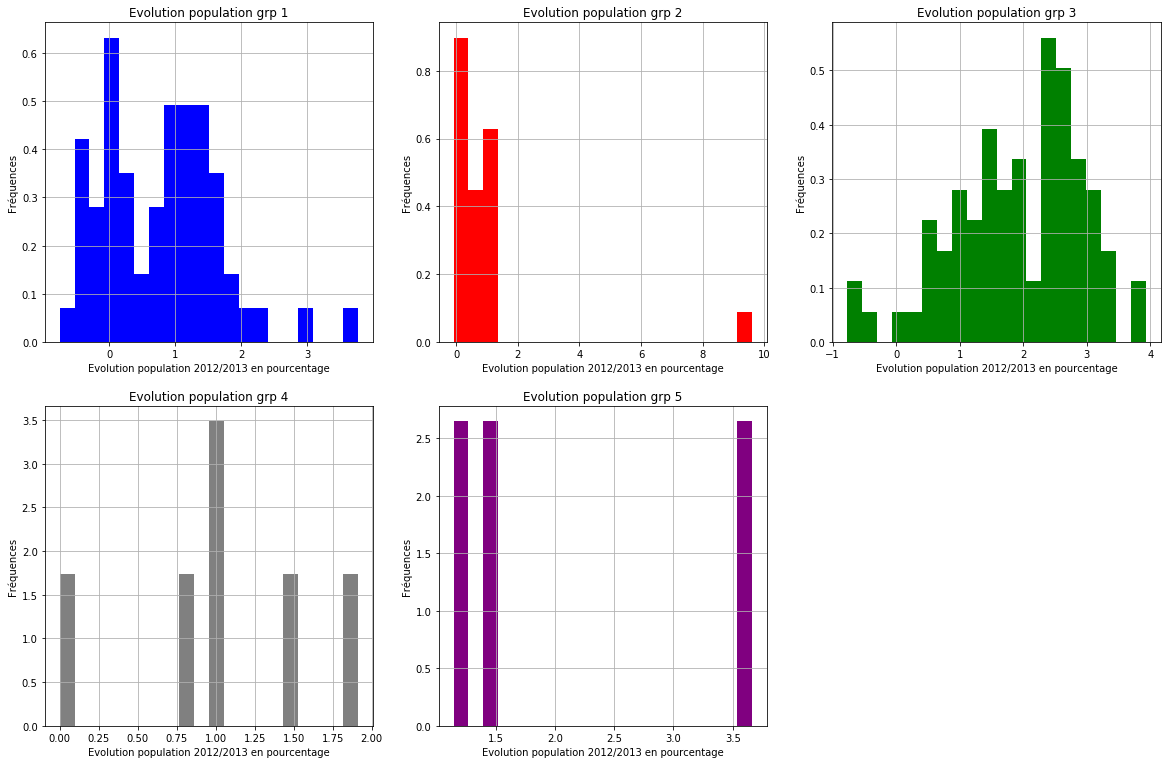

In [49]:
fig5 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Evolution population grp 1')
plot_df_groupe1.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Evolution population grp 2')
plot_df_groupe2.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Evolution population grp 3')
plot_df_groupe3.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Evolution population grp 4')
plot_df_groupe4.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Evolution population grp 5')
plot_df_groupe5.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe5.set_ylabel('Fréquences')

fig5.savefig('../presentation/images/compare_evolution_pop_grp_pib')

##### Synthèse proportion protéine animale dans disponibilité protéine totale

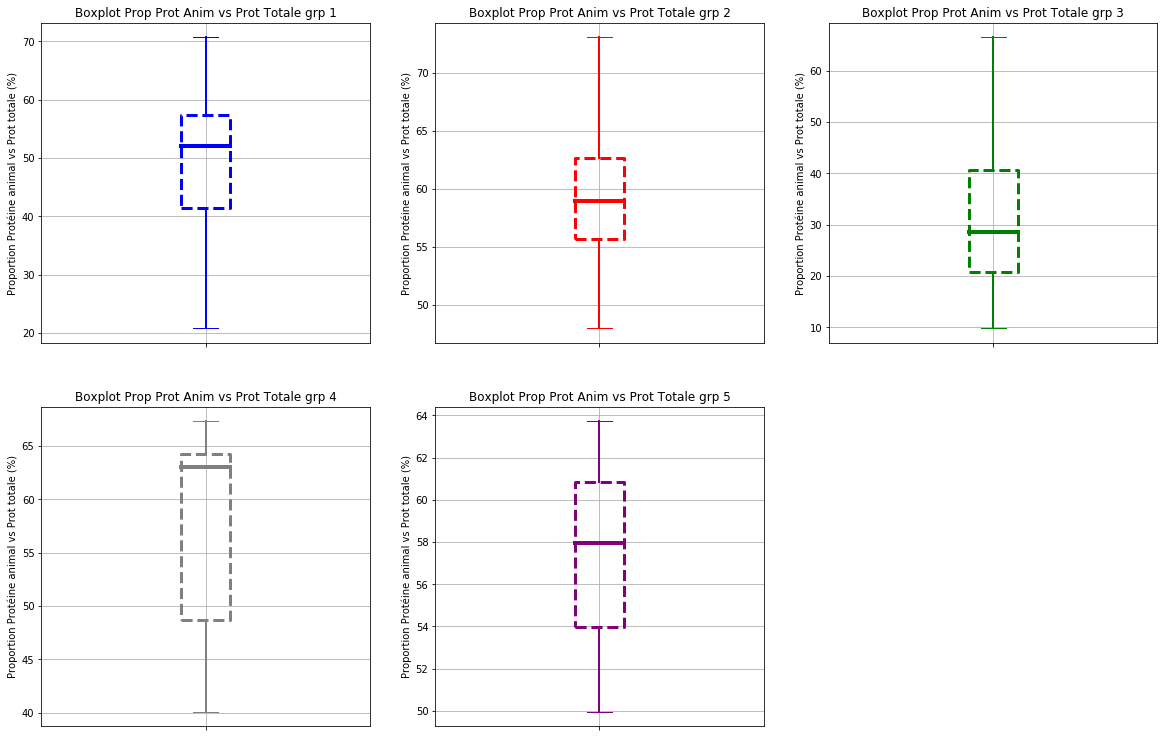

In [50]:
fig6 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 1')
plot_df_groupe1.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe1.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 2')
plot_df_groupe2.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe2.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 3')
plot_df_groupe3.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe3.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 4')
plot_df_groupe4.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe4.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 5')
plot_df_groupe5.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe5.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')
    
fig6.savefig('../presentation/images/compare_prop_prot_grp_pib')

#### Pays à cibler avec 5 groupes (Agglo - Ward)

In [51]:
pays_a_cibler_agglo_ward_5_grp = result_cah_5_grp[result_cah_5_grp['cluster ID']==0]
pays_a_cibler_agglo_ward_5_grp

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
1,0,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
2,0,Albanie,10504.1,0.347881,3188.0,111.37,53.461435
3,0,Algérie,13253.2,1.886596,3293.0,91.92,27.241079
6,0,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
8,0,Argentine,19482.2,0.873756,3226.0,102.60,65.233918
12,0,Azerbaïdjan,16593.2,1.117198,3113.0,93.11,32.381055
13,0,Bahamas,22714.8,1.344086,2670.0,86.16,67.490715
15,0,Barbade,15335.3,0.706714,2936.0,88.76,58.370888
16,0,Bélarus,17656.1,-0.510367,3249.0,93.78,58.871828
22,0,Bosnie-Herzégovine,10269.2,-0.130412,3156.0,91.50,33.475410


Compte tenu de l'ajout de la variable 'PIB par habitant', il serait plus intéressant de cibler les pays du groupe 0. En effet, ces pays concentre de forts atouts pour une implantation à savoir, une concurrence des produits d'origine animale moyenne, un PIB par habitant suffisant pour acheter nos produits et une forte consommation de protéines.

### Pour aller plus loin : Calcul des centroïdes (Methode Kmeans - ward) de chacun des groupes (5 groupes)

In [52]:
X = pd.DataFrame(df_base_pib.values)
#y = df_base_cah_group_pib.index

est = KMeans(n_clusters=5)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = pd.DataFrame(est.cluster_centers_[Y['cluster ID']],columns=['centroid_pib', 'centroid_evol','centroid_dispo_alim_kcal','centroid_dispo_prot','centroid_prop'])
result_kmeans_5_grp = pd.concat([Y, Z], axis=1)
result_kmeans_5_grp.head(10)



,cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,0,3578.438667,1.888701,2531.986667,66.699333,30.627302
1,2,13697.954348,1.031835,2891.239130,83.153913,46.129732
2,2,13697.954348,1.031835,2891.239130,83.153913,46.129732
3,2,13697.954348,1.031835,2891.239130,83.153913,46.129732
4,1,43850.805263,1.117840,3351.315789,104.223684,60.948764
5,0,3578.438667,1.888701,2531.986667,66.699333,30.627302
6,2,13697.954348,1.031835,2891.239130,83.153913,46.129732
7,1,43850.805263,1.117840,3351.315789,104.223684,60.948764
8,2,13697.954348,1.031835,2891.239130,83.153913,46.129732
9,0,3578.438667,1.888701,2531.986667,66.699333,30.627302


In [53]:
df_base_pib = df_base_pib.reset_index()
df_base_with_centroid = df_base_pib.join(result_kmeans_5_grp)


In [54]:
df_group_centroid_kmeans_5_grp = df_base_with_centroid.groupby('cluster ID').first().reset_index()

In [55]:
del df_group_centroid_kmeans_5_grp['Pays']

In [56]:
df_group_centroid_kmeans_5_grp

,cluster ID,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,0,1814.2,2.437552,2087.0,58.26,20.992104,3578.438667,1.888701,2531.986667,66.699333,30.627302
1,1,42914.5,-0.088164,3503.0,101.39,60.656870,43850.805263,1.117840,3351.315789,104.223684,60.948764
2,2,12445.6,0.744474,3020.0,85.33,42.646197,13697.954348,1.031835,2891.239130,83.153913,46.129732
3,3,79070.2,1.456311,2985.0,93.29,57.969772,73887.380000,1.752962,3356.400000,106.064000,54.783257
4,4,22714.8,1.344086,2670.0,86.16,67.490715,26398.107692,0.376068,3188.076923,95.941538,55.404586


#### Centroïdes normés Kmeans ward (5 groupes)

In [57]:
df_group_centroid_kmeans_norm_5_grp = df_group_centroid_kmeans_5_grp.copy()
df_group_centroid_kmeans_norm_5_grp.index = df_group_centroid_kmeans_norm_5_grp['cluster ID']
df_group_centroid_kmeans_norm_5_grp.drop(['cluster ID','PiB par habitant (PPA)','Evolution population 2012/2013 en pourcentage','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)',"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)"], axis=1,inplace=True)
total_tab =df_group_centroid_kmeans_norm_5_grp.sum().sum()
df_group_centroid_kmeans_norm_5_grp = df_group_centroid_kmeans_norm_5_grp/total_tab
df_group_centroid_kmeans_norm_5_grp

,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
cluster ID,,,,,
0,0.020167,0.000011,0.014269,0.000376,0.000173
1,0.247128,0.000006,0.018887,0.000587,0.000343
2,0.077197,0.000006,0.016294,0.000469,0.000260
3,0.416403,0.000010,0.018915,0.000598,0.000309
4,0.148770,0.000002,0.017967,0.000541,0.000312


#### Pays à cibler avec 5 groupes (Kmeans)

In [58]:
pays_a_cibler_kmeans_5_grp = df_base_with_centroid[df_base_with_centroid['cluster ID']==2]
pays_a_cibler_kmeans_5_grp

,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
1,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
2,Albanie,10504.1,0.347881,3188.0,111.37,53.461435,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
3,Algérie,13253.2,1.886596,3293.0,91.92,27.241079,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
6,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
8,Argentine,19482.2,0.873756,3226.0,102.60,65.233918,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
12,Azerbaïdjan,16593.2,1.117198,3113.0,93.11,32.381055,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
15,Barbade,15335.3,0.706714,2936.0,88.76,58.370888,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
16,Bélarus,17656.1,-0.510367,3249.0,93.78,58.871828,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
22,Bosnie-Herzégovine,10269.2,-0.130412,3156.0,91.50,33.475410,2,13697.954348,1.031835,2891.23913,83.153913,46.129732
23,Botswana,15568.3,0.848303,2325.0,64.85,41.603701,2,13697.954348,1.031835,2891.23913,83.153913,46.129732


Avec la methode des Kmeans nous avons de nouveaux groupe. Ici encore, le groupe le plus intéressant est celui avec un PIB par habitant suffisant (13600), une concurrence moyenne et un fort attrait pour les produits d'origine animale.

Pour avoir un nombre raisonnable de pays dans lesquels s'implanter nous allons determiner 6 groupes de pays.

### Calcul des centroïdes avec 8 groupes (Agglo - Ward)

In [59]:
df_base_pib2 = df_base_pib.copy()
df_base_pib2.index = df_base_pib2['Pays']
del df_base_pib2['Pays']


In [60]:

X = pd.DataFrame(df_base_pib2.values)


est = AgglomerativeClustering(n_clusters=8)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = df_base_pib2.reset_index()
result_cah_8_grp = pd.concat([Y, Z], axis=1)
result_cah_8_grp.head(10)


,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,0,Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
1,7,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
2,7,Albanie,10504.1,0.347881,3188.0,111.37,53.461435
3,7,Algérie,13253.2,1.886596,3293.0,91.92,27.241079
4,6,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
5,0,Angola,6185.0,3.126651,2474.0,57.27,32.268203
6,5,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
7,1,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
8,5,Argentine,19482.2,0.873756,3226.0,102.60,65.233918
9,0,Arménie,7727.9,0.269451,2924.0,90.06,48.123473


In [61]:
df_group_centroid_ward_8_grp = result_cah_8_grp.groupby('cluster ID').mean()

In [62]:
df_group_centroid_ward_8_grp

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
cluster ID,,,,,
0,3646.573684,1.913598,2539.447368,66.868816,30.675032
1,55466.733333,1.038192,3292.666667,99.916667,56.980949
2,24209.694118,0.312361,3172.647059,94.662941,55.145413
3,33298.054545,0.535848,3230.181818,100.202727,56.478431
4,81368.266667,2.087629,3341.333333,105.026667,57.218575
5,17088.410000,0.823602,2915.750000,83.675500,48.590905
6,42837.591667,1.373310,3420.333333,107.891667,61.938474
7,11528.242308,1.031415,2870.730769,82.933077,45.108420


#### Tab centroïdes normés CAH ward (8 grp)

In [63]:
df_group_centroid_ward_norm_8_grp = df_group_centroid_ward_8_grp.copy()
total_tab = df_group_centroid_ward_norm_8_grp.sum().sum()
df_group_centroid_ward_norm_8_grp = df_group_centroid_ward_norm_8_grp/total_tab
df_group_centroid_ward_norm_8_grp

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
cluster ID,,,,,
0,0.012345,0.000006,0.008597,0.000226,0.000104
1,0.187775,0.000004,0.011147,0.000338,0.000193
2,0.081959,0.000001,0.010741,0.000320,0.000187
3,0.112726,0.000002,0.010935,0.000339,0.000191
4,0.275461,0.000007,0.011312,0.000356,0.000194
5,0.057851,0.000003,0.009871,0.000283,0.000164
6,0.145021,0.000005,0.011579,0.000365,0.000210
7,0.039027,0.000003,0.009718,0.000281,0.000153


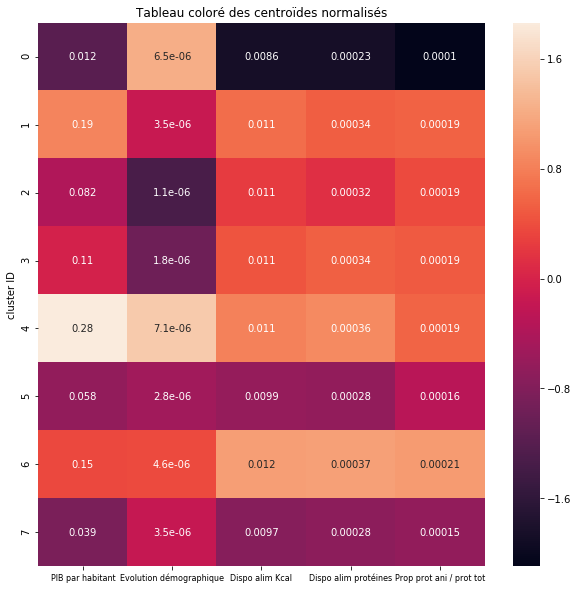

In [64]:
df_norm_col=(df_group_centroid_ward_norm_8_grp-df_group_centroid_ward_norm_8_grp.mean())/df_group_centroid_ward_norm_8_grp.std() #Normalisation des couleurs
fig = plt.figure(figsize=(10,10))
plt.title('Tableau coloré des centroïdes normalisés')
plot = sns.heatmap(df_norm_col,annot=df_group_centroid_ward_norm_8_grp,xticklabels=['PIB par habitant','Evolution démographique','Dispo alim Kcal','Dispo alim protéines','Prop prot ani / prot tot'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, fontsize = 8)
fig.savefig('../presentation/images/tab_color_centroides_8_grp')

#### Caractéristiques de chaque groupe

In [65]:
df_groupe1 = result_cah_8_grp[result_cah_8_grp['cluster ID']==0]
df_groupe2 = result_cah_8_grp[result_cah_8_grp['cluster ID']==1]
df_groupe3 = result_cah_8_grp[result_cah_8_grp['cluster ID']==2]
df_groupe4 = result_cah_8_grp[result_cah_8_grp['cluster ID']==3]
df_groupe5 = result_cah_8_grp[result_cah_8_grp['cluster ID']==4]
df_groupe6 = result_cah_8_grp[result_cah_8_grp['cluster ID']==5]
df_groupe7 = result_cah_8_grp[result_cah_8_grp['cluster ID']==6]
df_groupe8 = result_cah_8_grp[result_cah_8_grp['cluster ID']==7]


##### Synthèse variable PIB par habitant

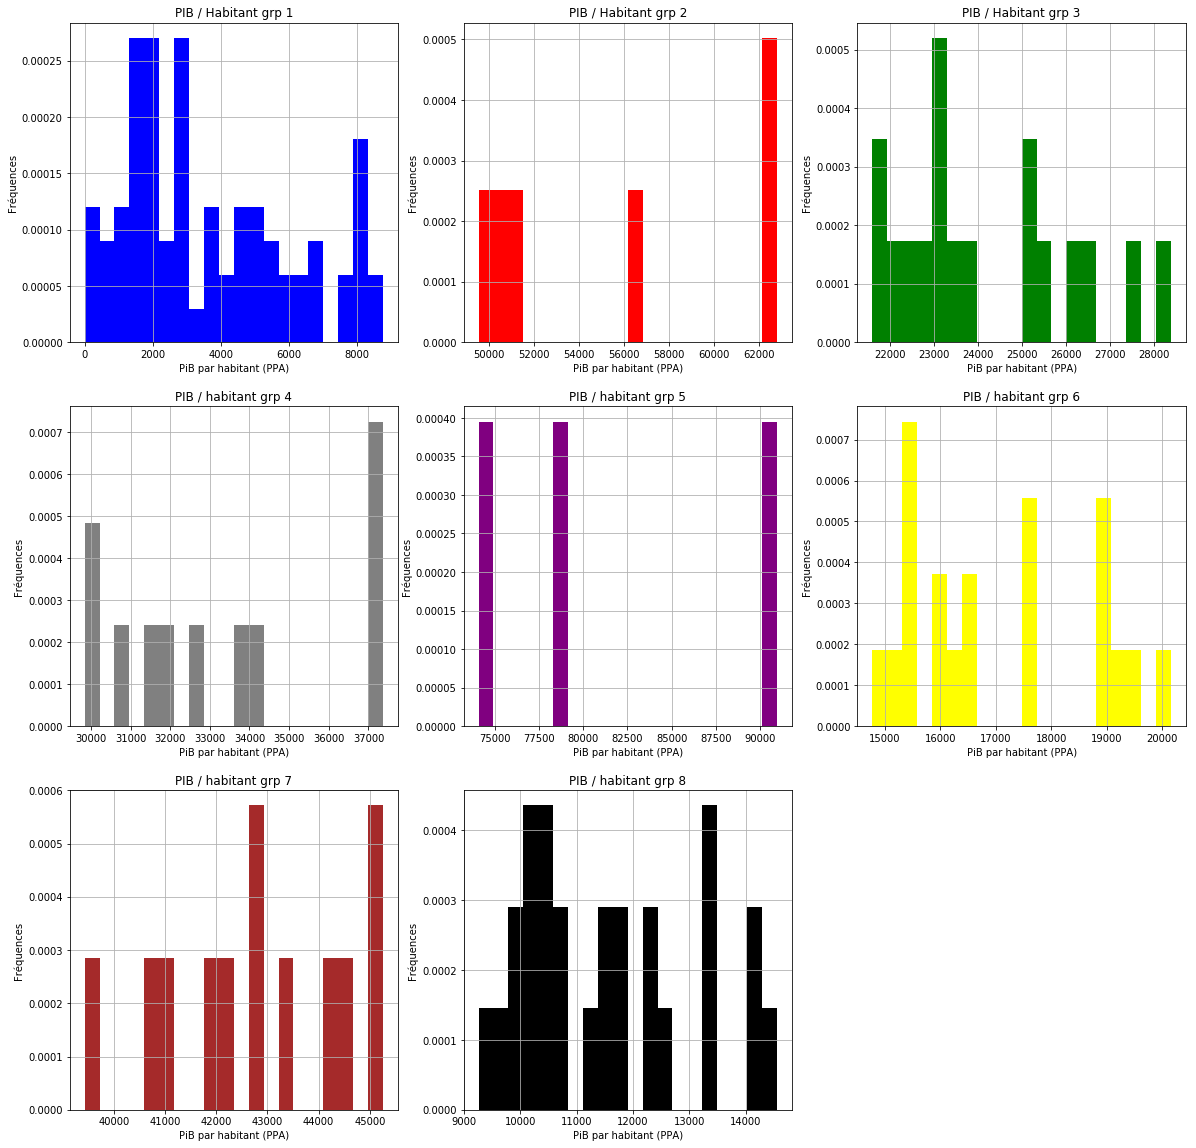

In [66]:
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['PiB par habitant (PPA)'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('PIB / Habitant grp 1')
plot_df_groupe1.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['PiB par habitant (PPA)'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('PIB / Habitant grp 2')
plot_df_groupe2.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['PiB par habitant (PPA)'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('PIB / Habitant grp 3')
plot_df_groupe3.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['PiB par habitant (PPA)'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('PIB / habitant grp 4')
plot_df_groupe4.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['PiB par habitant (PPA)'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('PIB / habitant grp 5')
plot_df_groupe5.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe5.set_ylabel('Fréquences')

plt.subplot(3,3,6)
plot_df_groupe5 = df_groupe6['PiB par habitant (PPA)'].hist(density=True, bins=20,color='yellow')
plot_df_groupe5.set_title('PIB / habitant grp 6')
plot_df_groupe5.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe5.set_ylabel('Fréquences')

plt.subplot(3,3,7)
plot_df_groupe5 = df_groupe7['PiB par habitant (PPA)'].hist(density=True, bins=20,color='brown')
plot_df_groupe5.set_title('PIB / habitant grp 7')
plot_df_groupe5.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe5.set_ylabel('Fréquences')

plt.subplot(3,3,8)
plot_df_groupe5 = df_groupe8['PiB par habitant (PPA)'].hist(density=True, bins=20,color='black')
plot_df_groupe5.set_title('PIB / habitant grp 8')
plot_df_groupe5.set_xlabel('PiB par habitant (PPA)')
plot_df_groupe5.set_ylabel('Fréquences')

fig3.savefig('../presentation/images/compare_pib_hab_8_grp')

##### Synthèse Disponibilité alimentaire 

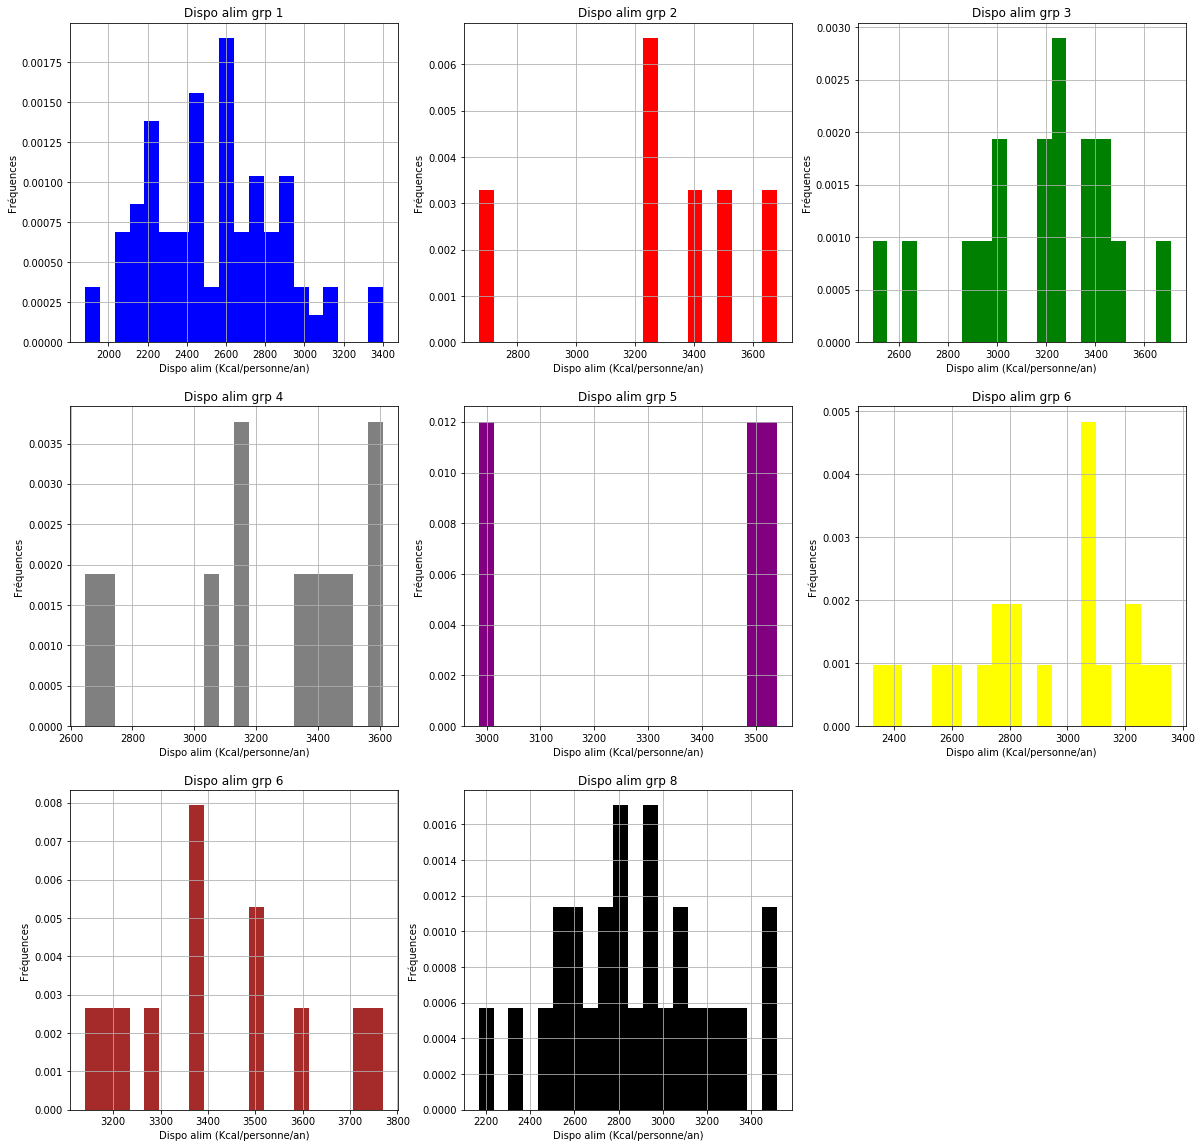

In [67]:
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Dispo alim grp 1')
plot_df_groupe1.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Dispo alim grp 2')
plot_df_groupe2.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Dispo alim grp 3')
plot_df_groupe3.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Dispo alim grp 4')
plot_df_groupe4.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Dispo alim grp 5')
plot_df_groupe5.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe5.set_ylabel('Fréquences')

plt.subplot(3,3,6)
plot_df_groupe6 = df_groupe6['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='yellow')
plot_df_groupe6.set_title('Dispo alim grp 6')
plot_df_groupe6.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe6.set_ylabel('Fréquences')

plt.subplot(3,3,7)
plot_df_groupe7 = df_groupe7['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='brown')
plot_df_groupe7.set_title('Dispo alim grp 6')
plot_df_groupe7.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe7.set_ylabel('Fréquences')

plt.subplot(3,3,8)
plot_df_groupe8 = df_groupe8['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='black')
plot_df_groupe8.set_title('Dispo alim grp 8')
plot_df_groupe8.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe8.set_ylabel('Fréquences')


fig3.savefig('../presentation/images/compare_dispo_alim_8_grp_pib')

##### Synthèse Disponibilité alimentaire en protéine

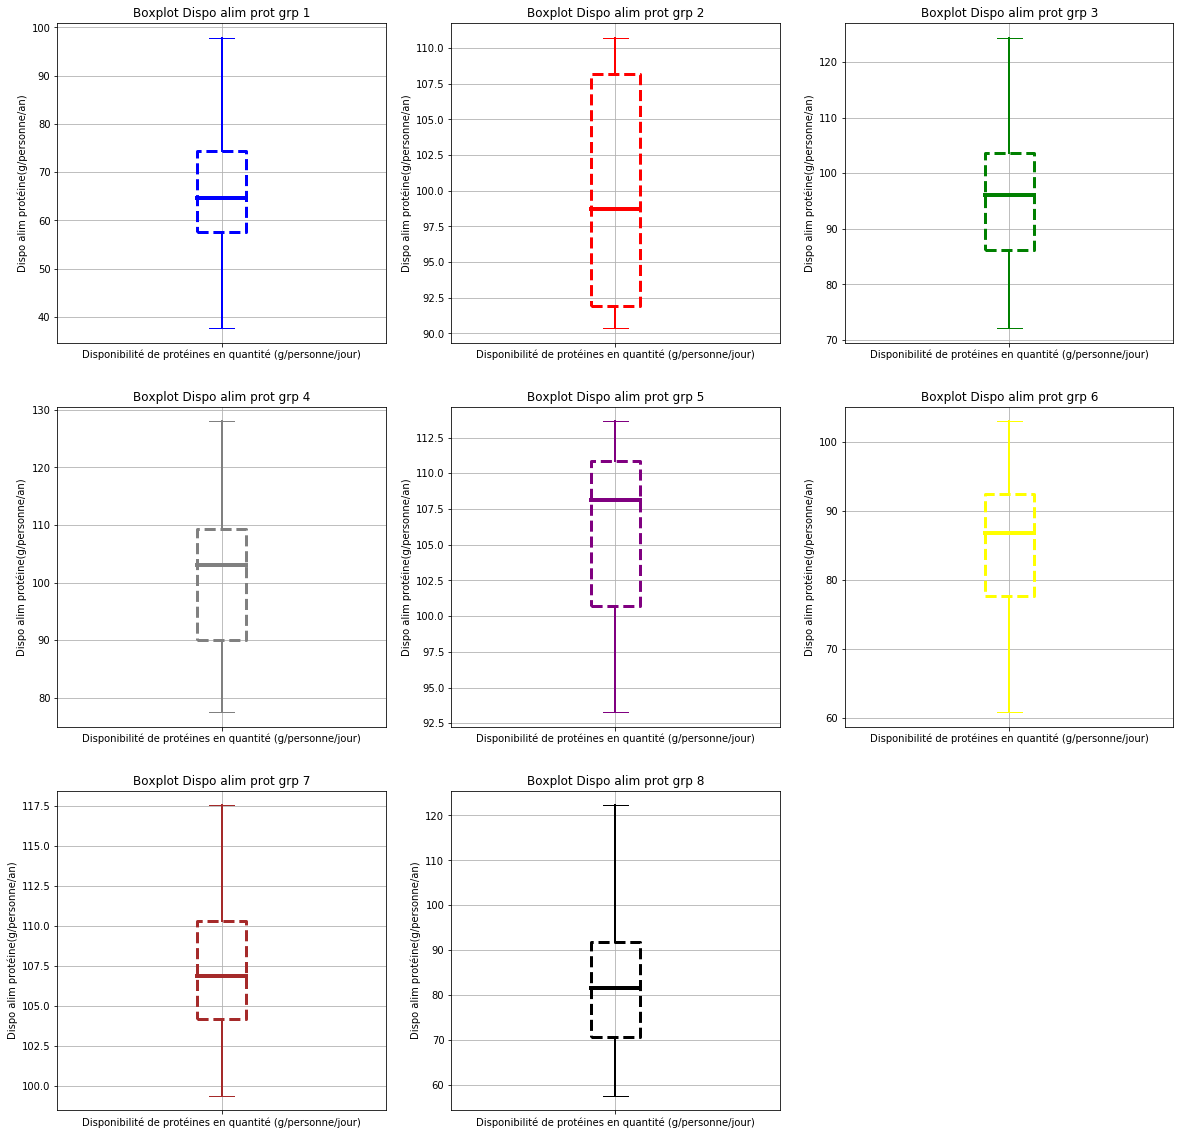

In [68]:
fig4 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Dispo alim prot grp 1')
plot_df_groupe1.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Dispo alim prot grp 2')
plot_df_groupe2.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Dispo alim prot grp 3')
plot_df_groupe3.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Dispo alim prot grp 4')
plot_df_groupe4.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Dispo alim prot grp 5')
plot_df_groupe5.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')
    
plot_df_groupe6= plt.subplot(3,3,6)
BoxplotElements = df_groupe6.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe6.set_title('Boxplot Dispo alim prot grp 6')
plot_df_groupe6.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('yellow')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('yellow')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('yellow')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('yellow')   

plot_df_groupe7= plt.subplot(3,3,7)
BoxplotElements = df_groupe7.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe7.set_title('Boxplot Dispo alim prot grp 7')
plot_df_groupe7.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('brown')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('brown')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('brown')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('brown')
    
plot_df_groupe8= plt.subplot(3,3,8)
BoxplotElements = df_groupe8.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe8.set_title('Boxplot Dispo alim prot grp 8')
plot_df_groupe8.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('black')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('black')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('black')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('black')
fig4.savefig('../presentation/images/compare_dispo_alim_prot_8_grp_pib')

##### Synthèse Evolution population

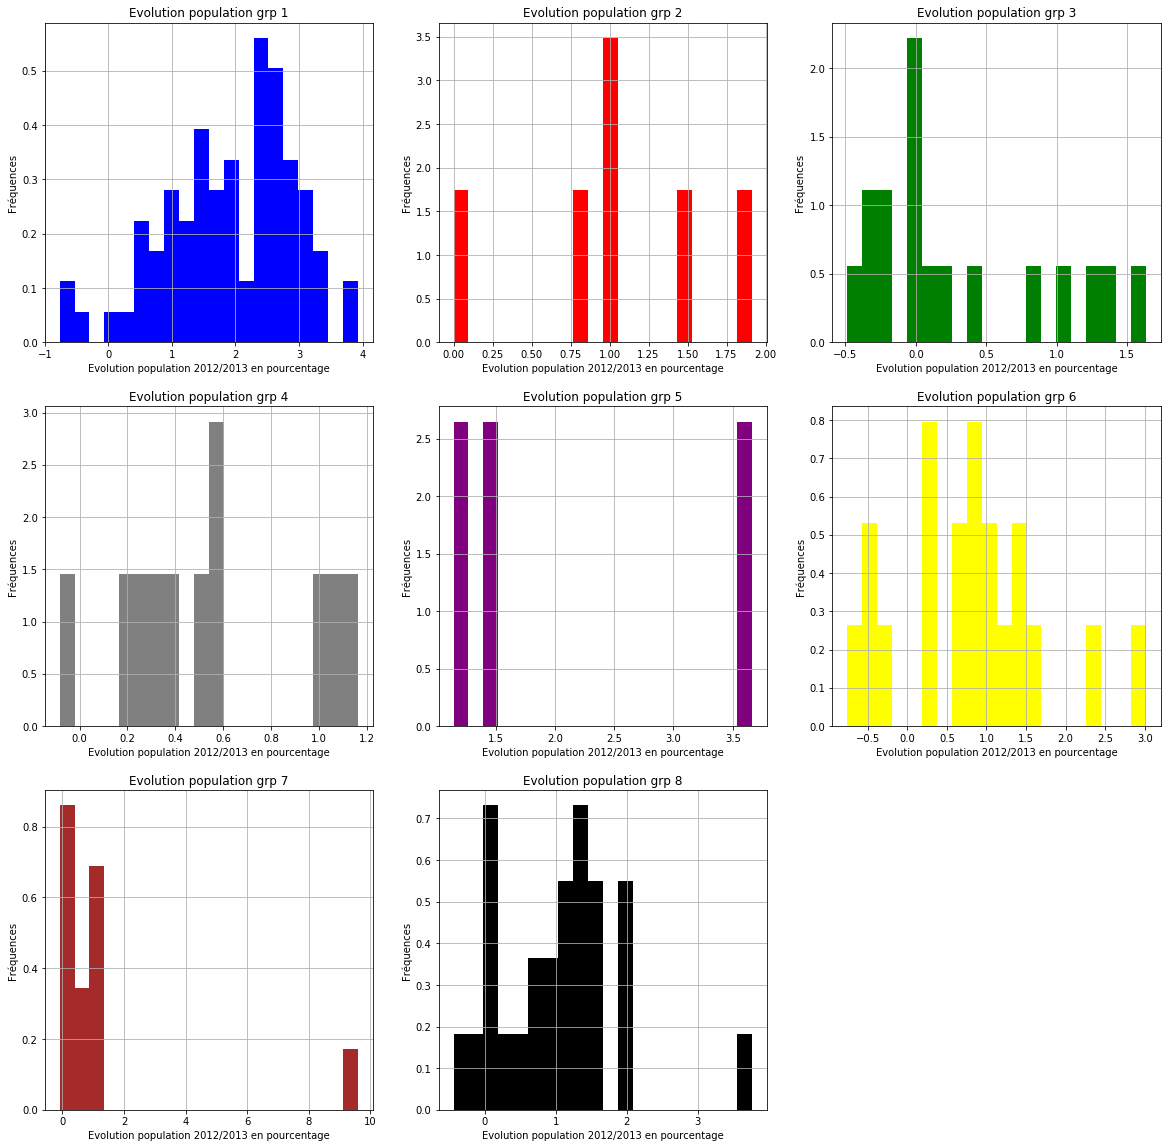

In [69]:
fig5 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Evolution population grp 1')
plot_df_groupe1.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Evolution population grp 2')
plot_df_groupe2.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Evolution population grp 3')
plot_df_groupe3.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Evolution population grp 4')
plot_df_groupe4.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Evolution population grp 5')
plot_df_groupe5.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe5.set_ylabel('Fréquences')

plt.subplot(3,3,6)
plot_df_groupe6 = df_groupe6['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='yellow')
plot_df_groupe6.set_title('Evolution population grp 6')
plot_df_groupe6.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe6.set_ylabel('Fréquences')

plt.subplot(3,3,7)
plot_df_groupe7 = df_groupe7['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='brown')
plot_df_groupe7.set_title('Evolution population grp 7')
plot_df_groupe7.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe7.set_ylabel('Fréquences')

plt.subplot(3,3,8)
plot_df_groupe8 = df_groupe8['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='black')
plot_df_groupe8.set_title('Evolution population grp 8')
plot_df_groupe8.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe8.set_ylabel('Fréquences')

fig5.savefig('../presentation/images/compare_evolution_pop_8_grp_pib')

##### Synthèse proportion protéine animale dans disponibilité protéine totale

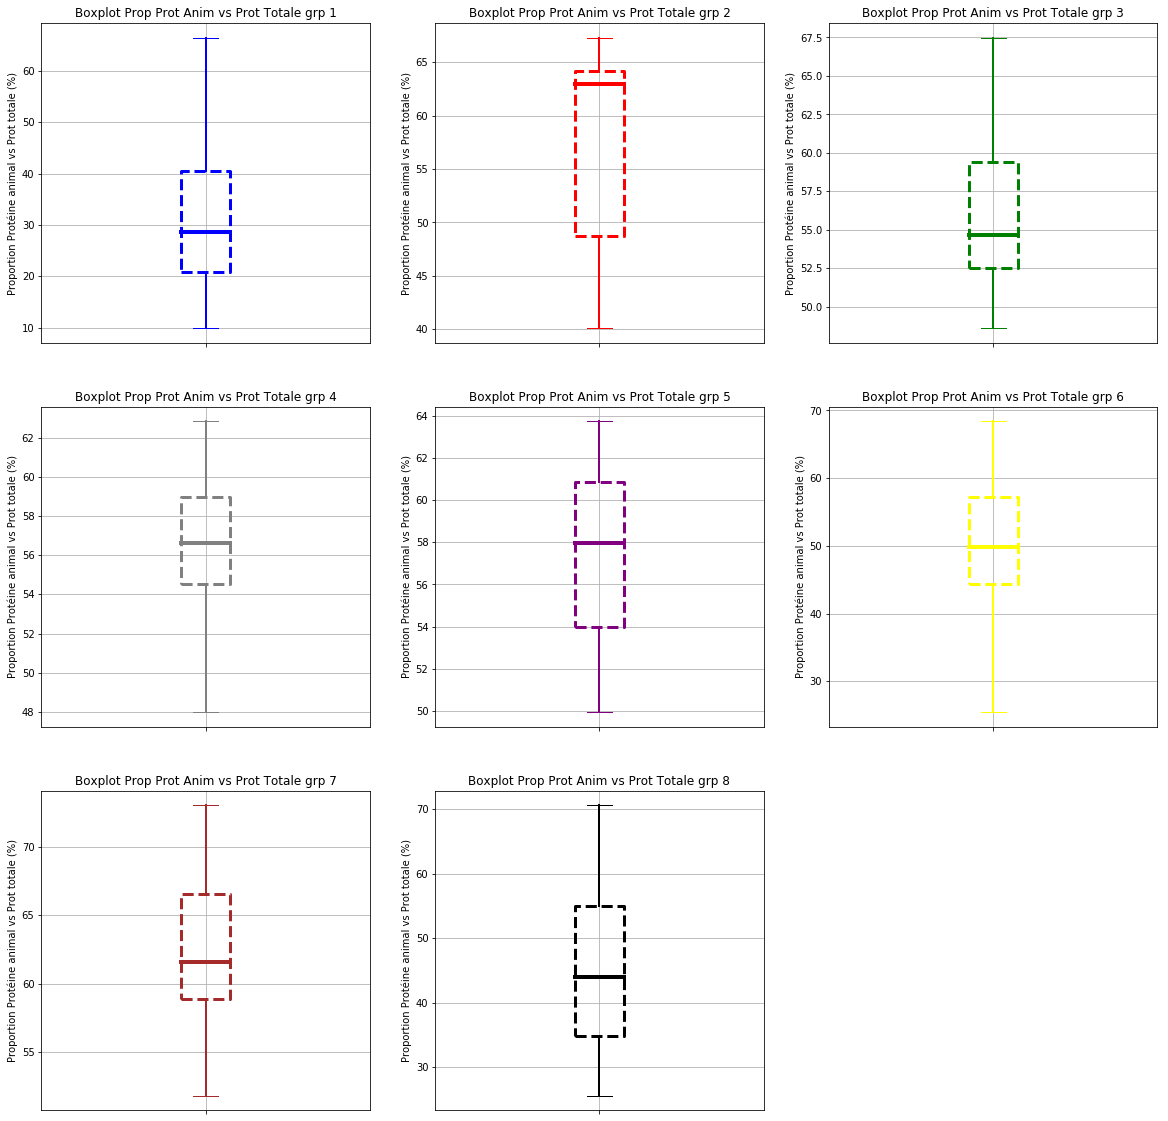

In [70]:
fig6 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 1')
plot_df_groupe1.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe1.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 2')
plot_df_groupe2.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe2.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 3')
plot_df_groupe3.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe3.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 4')
plot_df_groupe4.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe4.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 5')
plot_df_groupe5.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe5.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')
    
    
plot_df_groupe6= plt.subplot(3,3,6)
BoxplotElements = df_groupe6.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe6.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 6')
plot_df_groupe6.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe6.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('yellow')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('yellow')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('yellow')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('yellow')
    
plot_df_groupe7= plt.subplot(3,3,7)
BoxplotElements = df_groupe7.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe7.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 7')
plot_df_groupe7.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe7.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('brown')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('brown')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('brown')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('brown')
    
plot_df_groupe8= plt.subplot(3,3,8)
BoxplotElements = df_groupe8.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe8.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 8')
plot_df_groupe8.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe8.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('black')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('black')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('black')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('black')
    
fig6.savefig('../presentation/images/compare_prop_prot_8_grp_pib')

#### Pays à cibler avec 8 groupes (Agglo - Ward)

In [71]:
pays_a_cibler_ward_8_grp = result_cah_8_grp[result_cah_8_grp['cluster ID']==5]
pays_a_cibler_ward_8_grp

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
6,5,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
8,5,Argentine,19482.2,0.873756,3226.0,102.60,65.233918
12,5,Azerbaïdjan,16593.2,1.117198,3113.0,93.11,32.381055
15,5,Barbade,15335.3,0.706714,2936.0,88.76,58.370888
16,5,Bélarus,17656.1,-0.510367,3249.0,93.78,58.871828
23,5,Botswana,15568.3,0.848303,2325.0,64.85,41.603701
24,5,Brésil,15430.3,0.858771,3262.0,95.01,55.352068
26,5,Bulgarie,15997.2,-0.755702,2828.0,83.41,49.634336
39,5,Croatie,20153.3,-0.394706,3056.0,84.27,56.924172
56,5,Gabon,16502.8,2.388242,2826.0,86.28,50.162262


Ici le groupe qui conjugue nos attentes est le groupe numéro 5

### Calcul des centroides avec 8 groupes (Kmeans - ward)

In [72]:
X = pd.DataFrame(df_base_pib2.values)

est = KMeans(n_clusters=8)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = pd.DataFrame(est.cluster_centers_[Y['cluster ID']],columns=['centroid_pib', 'centroid_evol','centroid_dispo_alim_kcal','centroid_dispo_prot','centroid_prop'])
result_kmeans_8_grp = pd.concat([Y, Z], axis=1)
result_kmeans_8_grp.head(10)

,cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,5,2562.076271,2.076953,2483.745763,64.764407,28.134349
1,0,9277.448649,1.129936,2779.648649,78.000541,42.652985
2,0,9277.448649,1.129936,2779.648649,78.000541,42.652985
3,3,16162.428000,0.990765,2940.320000,84.816400,47.237130
4,1,44351.100000,1.279604,3376.600000,105.738000,61.236844
5,0,9277.448649,1.129936,2779.648649,78.000541,42.652985
6,3,16162.428000,0.990765,2940.320000,84.816400,47.237130
7,1,44351.100000,1.279604,3376.600000,105.738000,61.236844
8,3,16162.428000,0.990765,2940.320000,84.816400,47.237130
9,0,9277.448649,1.129936,2779.648649,78.000541,42.652985


In [73]:
df_base_pib2 = df_base_pib2.reset_index()
df_base_with_centroid2 = df_base_pib2.join(result_kmeans_8_grp)


In [74]:
df_group_centroid_kmeans_8_grp = df_base_with_centroid2.groupby('cluster ID').first().reset_index()
del df_group_centroid_kmeans_8_grp['Pays']
df_group_centroid_kmeans_8_grp

,cluster ID,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,0,12445.6,0.744474,3020.0,85.33,42.646197,9277.448649,1.129936,2779.648649,78.000541,42.652985
1,1,42914.5,-0.088164,3503.0,101.39,60.656870,44351.100000,1.279604,3376.600000,105.738000,61.236844
2,2,22714.8,1.344086,2670.0,86.16,67.490715,23984.338889,0.273080,3166.166667,94.085556,55.244233
3,3,13253.2,1.886596,3293.0,91.92,27.241079,16162.428000,0.990765,2940.320000,84.816400,47.237130
4,4,79070.2,1.456311,2985.0,93.29,57.969772,81368.266667,2.087629,3341.333333,105.026667,57.218575
5,5,1814.2,2.437552,2087.0,58.26,20.992104,2562.076271,2.076953,2483.745763,64.764407,28.134349
6,6,62532.7,1.520747,3275.0,104.51,40.082289,60528.333333,1.171602,3383.666667,102.710000,55.531573
7,7,29842.9,1.062888,2646.0,77.54,58.653598,33298.054545,0.535848,3230.181818,100.202727,56.478431


#### Centroïdes normés Kmeans ward (8grp)

In [75]:
df_group_centroid_kmeans_norm_8_grp = df_group_centroid_kmeans_8_grp.copy()
df_group_centroid_kmeans_norm_8_grp.index = df_group_centroid_kmeans_norm_8_grp['cluster ID']
df_group_centroid_kmeans_norm_8_grp.drop(['cluster ID','PiB par habitant (PPA)','Evolution population 2012/2013 en pourcentage','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)',"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)"], axis=1,inplace=True)
total_tab =df_group_centroid_kmeans_norm_8_grp.sum().sum()
df_group_centroid_kmeans_norm_8_grp = df_group_centroid_kmeans_norm_8_grp/total_tab
df_group_centroid_kmeans_norm_8_grp

,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
cluster ID,,,,,
0,0.031197,3.799607e-06,0.009347,0.000262,0.000143
1,0.149138,4.302893e-06,0.011354,0.000356,0.000206
2,0.080652,9.182778e-07,0.010647,0.000316,0.000186
3,0.054349,3.331622e-06,0.009887,0.000285,0.000159
4,0.273615,7.020017e-06,0.011236,0.000353,0.000192
5,0.008615,6.984115e-06,0.008352,0.000218,0.000095
6,0.203537,3.939715e-06,0.011378,0.000345,0.000187
7,0.111971,1.801883e-06,0.010862,0.000337,0.000190


#### Pays à cibler avec 8 groupes (Kmeans ward)

In [76]:
pays_a_cibler_kmeans_8_grp = df_base_with_centroid2[df_base_with_centroid2['cluster ID']==1]
pays_a_cibler_kmeans_8_grp

,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
4,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870,1,44351.1,1.279604,3376.6,105.738,61.236844
7,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883,1,44351.1,1.279604,3376.6,105.738,61.236844
10,Australie,42920.1,1.271150,3278.0,106.26,67.852437,1,44351.1,1.279604,3376.6,105.738,61.236844
11,Autriche,44161.5,0.366257,3770.0,106.20,59.284369,1,44351.1,1.279604,3376.6,105.738,61.236844
17,Belgique,40780.9,0.397830,3737.0,99.37,58.508604,1,44351.1,1.279604,3376.6,105.738,61.236844
20,Bermudes,50669.3,0.000000,2668.0,90.36,67.319610,1,44351.1,1.279604,3376.6,105.738,61.236844
31,Canada,42335.7,0.987428,3499.0,105.06,52.312964,1,44351.1,1.279604,3376.6,105.738,61.236844
41,Danemark,44564.5,0.375134,3366.0,108.74,64.199007,1,44351.1,1.279604,3376.6,105.738,61.236844
50,États-Unis d'Amérique,51008.5,0.801877,3682.0,109.42,63.763480,1,44351.1,1.279604,3376.6,105.738,61.236844
54,Finlande,39428.3,0.332840,3366.0,117.56,62.521266,1,44351.1,1.279604,3376.6,105.738,61.236844


Avec la methode des Kmeans, nous choisirons le groupe avec un centroid du PIB par habitant de 16300

## Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP

### Methode CAH ward 5 groupes sans variable PIB

In [77]:
df_base_sans_pib = joint_df_base_cah_group.copy()

df_base_sans_pib.index = df_base_sans_pib['Pays']
del df_base_sans_pib['Pays']
del df_base_sans_pib['groupe_cah']

In [78]:
df_base_sans_pib

,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
Pays,,,,
Éthiopie,2.585878,2129.0,60.39,12.733896
Madagascar,2.830358,2056.0,46.69,21.503534
Guinée-Bissau,2.403846,2288.0,44.05,20.408627
Ouganda,3.392395,2126.0,52.64,23.537234
Timor-Leste,1.705566,2129.0,57.51,31.333681
Équateur,1.587916,2346.0,61.30,59.624796
Zimbabwe,3.104051,2113.0,48.32,24.482616
Rwanda,2.784081,2224.0,56.79,9.860891
Yémen,2.326849,2217.0,58.90,23.684211


In [79]:
ACP = PCA(n_components=2)
acp = ACP.fit_transform(df_base_sans_pib.values)
df_acp = pd.DataFrame(data = acp, columns = ['principal component 1', 'principal component 2'])

In [80]:
df_base_sans_pib = df_base_sans_pib.reset_index()
a = df_acp.join(df_base_sans_pib['Pays'])
b = a.join(joint_df_base_cah_group['groupe_cah'])

In [81]:
b.head(10)

,principal component 1,principal component 2,Pays,groupe_cah
0,715.255124,-9.555200,Éthiopie,1
1,788.535098,-5.297034,Madagascar,1
2,556.895106,-16.033137,Guinée-Bissau,1
3,718.328281,-3.383043,Ouganda,1
4,714.971188,5.700158,Timor-Leste,1
5,497.436830,24.570435,Équateur,1
6,731.464979,-4.019463,Zimbabwe,1
7,620.553936,-17.263662,Rwanda,1
8,627.168605,-3.738911,Yémen,1
9,755.531087,-6.200436,Haïti,1


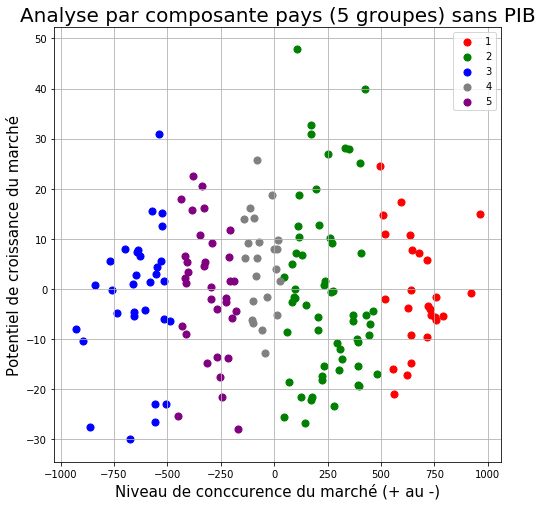

In [82]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Niveau de conccurence du marché (+ au -)", fontsize = 15)
ax.set_ylabel("Potentiel de croissance du marché", fontsize = 15)
ax.set_title('Analyse par composante pays (5 groupes) sans PIB', fontsize = 20)

targets = [1,2,3,4,5]
colors = ['r', 'g', 'b','grey','purple']

for target, color in zip(targets,colors):
    indicesToKeep = b['groupe_cah'] == target
    ax.scatter(b.loc[indicesToKeep, 'principal component 1']
               , b.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

fig.savefig('../presentation/images/pca_ward_5_sans_pib')

Contribution des variables aux axes principaux

In [83]:
del df_base_sans_pib['Pays']

In [84]:
coefficients = ACP.components_.T * np.sqrt(ACP.explained_variance_)
df_coefficients = pd.DataFrame(data = coefficients, columns = ['principal component 1', 'principal component 2'],index=df_base_sans_pib.columns)
df_coefficients

,principal component 1,principal component 2
Evolution population 2012/2013 en pourcentage,0.529758,-0.376089
Disponibilité alimentaire (Kcal/personne/jour),-440.919543,-0.524832
Disponibilité de protéines en quantité (g/personne/jour),-17.394546,6.461305
Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),-9.405966,12.632183


Variable qui a le plus contribué à l'axe des abscisses : Disponibilité alimentaire <br/>
Variable qui a le plus contribué à l'axe des ordonnés : Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)


## Methode CAH ward 5 groupes avec PIB

In [85]:
df_base_pib4 = df_base_pib.copy()

df_base_pib4.index = df_base_pib4['Pays']
del df_base_pib4['Pays']

In [86]:
ACP2 = PCA(n_components=2)
acp = ACP2.fit_transform(df_base_pib4.values)
df_acp = pd.DataFrame(data = acp, columns = ['principal component 1', 'principal component 2'])


In [87]:
df_base_pib4 = df_base_pib4.reset_index()
a = df_acp.join(df_base_pib4['Pays'])
b = a.join(result_cah_5_grp['cluster ID'])

In [88]:
b.head(10)

,principal component 1,principal component 2,Pays,cluster ID
0,-14497.481394,508.604876,Afghanistan,2
1,-3851.637704,-242.572554,Afrique du Sud,0
2,-5789.949150,-444.736402,Albanie,0
3,-3039.486964,-501.569778,Algérie,0
4,26621.074362,-203.635792,Allemagne,1
5,-10120.692769,196.754463,Angola,2
6,2554.292572,470.732607,Antigua-et-Barbuda,0
7,33238.937158,158.216733,Arabie saoudite,3
8,3187.481464,-328.625517,Argentine,0
9,-8570.280455,-227.743916,Arménie,2


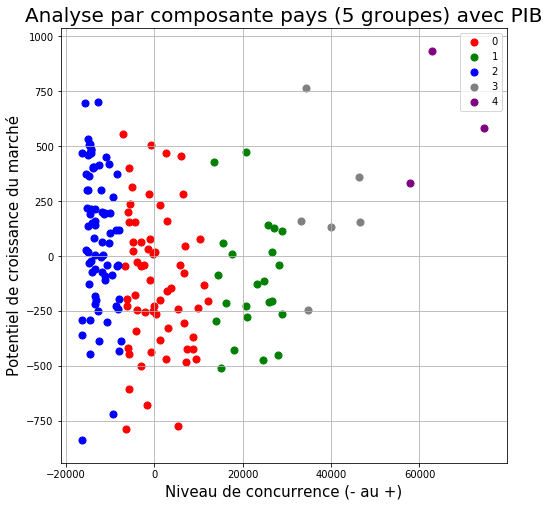

In [89]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Niveau de concurrence (- au +)', fontsize = 15)
ax.set_ylabel("Potentiel de croissance du marché", fontsize = 15)
ax.set_title('Analyse par composante pays (5 groupes) avec PIB', fontsize = 20)

targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','grey','purple']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'principal component 1']
               , b.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig('../presentation/images/pca_ward_5_avec_pib')

On cible le groupe 0

In [90]:
del df_base_pib4['Pays']

In [91]:
coefficients = ACP2.components_.T * np.sqrt(ACP2.explained_variance_)
df_coefficients = pd.DataFrame(data = coefficients, columns = ['principal component 1', 'principal component 2'],index=df_base_pib4.columns)
df_coefficients

,principal component 1,principal component 2
PiB par habitant (PPA),16883.930687,5.711574
Evolution population 2012/2013 en pourcentage,-0.288783,0.450691
Disponibilité alimentaire (Kcal/personne/jour),289.088724,-332.923290
Disponibilité de protéines en quantité (g/personne/jour),13.250461,-11.527151
Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),10.208836,-3.583908


Variable qui a le plus contribué à l'axe des abcisses : PiB par habitant (PPA) <br/>
Variable qui a le plus contribué à l'axe des ordonnés : Disponibilité alimentaire

### Methode CAH Ward 8 groupes

In [92]:
df_base_pib5 = df_base_pib.copy()

df_base_pib5.index = df_base_pib5['Pays']
del df_base_pib5['Pays']

In [93]:
ACP3 = PCA(n_components=2)
acp = ACP3.fit_transform(df_base_pib5.values)
df_acp = pd.DataFrame(data = acp, columns = ['principal component 1', 'principal component 2'])


In [94]:
df_base_pib5 = df_base_pib5.reset_index()
a = df_acp.join(df_base_pib5['Pays'])
b = a.join(result_cah_8_grp['cluster ID'])

In [95]:
b.head(10)

,principal component 1,principal component 2,Pays,cluster ID
0,-14497.481394,508.604876,Afghanistan,0
1,-3851.637704,-242.572554,Afrique du Sud,7
2,-5789.949150,-444.736402,Albanie,7
3,-3039.486964,-501.569778,Algérie,7
4,26621.074362,-203.635792,Allemagne,6
5,-10120.692769,196.754463,Angola,0
6,2554.292572,470.732607,Antigua-et-Barbuda,5
7,33238.937158,158.216733,Arabie saoudite,1
8,3187.481464,-328.625517,Argentine,5
9,-8570.280455,-227.743916,Arménie,0


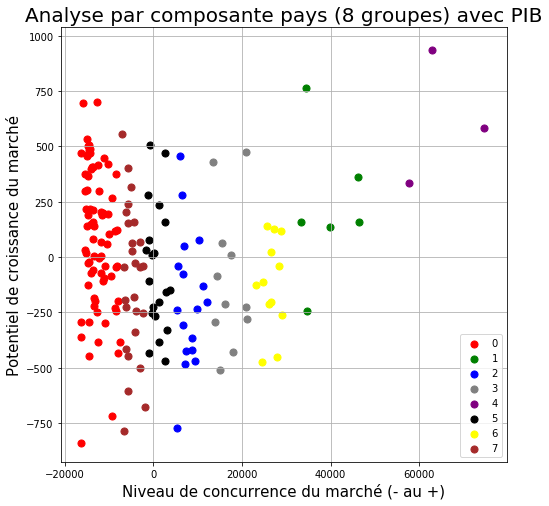

In [96]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Niveau de concurrence du marché (- au +)', fontsize = 15)
ax.set_ylabel("Potentiel de croissance du marché", fontsize = 15)
ax.set_title('Analyse par composante pays (8 groupes) avec PIB', fontsize = 20)

targets = [0,1,2,3,4,5,6,7]
colors = ['r', 'g', 'b','grey','purple','black','yellow','brown']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'principal component 1']
               , b.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets,loc='lower right')
ax.grid()
fig.savefig('../presentation/images/pca_ward_8_avec_pib')

On cible le groupe 5

In [97]:
del df_base_pib5['Pays']

In [98]:
coefficients = ACP3.components_.T * np.sqrt(ACP3.explained_variance_)
df_coefficients = pd.DataFrame(data = coefficients, columns = ['principal component 1', 'principal component 2'],index=df_base_pib5.columns)
df_coefficients

,principal component 1,principal component 2
PiB par habitant (PPA),16883.930687,5.711574
Evolution population 2012/2013 en pourcentage,-0.288783,0.450691
Disponibilité alimentaire (Kcal/personne/jour),289.088724,-332.923290
Disponibilité de protéines en quantité (g/personne/jour),13.250461,-11.527151
Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),10.208836,-3.583908


Variable qui a le plus contribué à l'axe des abcisses : PiB par habitant (PPA) <br/>
Variable qui a le plus contribué à l'axe des ordonnés : Disponibilité alimentaire

### Methode Kmeans  ward 5 grp

In [99]:
df_base_pib3 = df_base_pib.copy()

df_base_pib3.index = df_base_pib3['Pays']
del df_base_pib3['Pays']


In [100]:
acp = PCA(n_components=2).fit_transform(df_base_pib3.values)
df_acp = pd.DataFrame(data = acp, columns = ['principal component 1', 'principal component 2'])


In [101]:
df_base_pib3 = df_base_pib3.reset_index()
a = df_acp.join(df_base_pib3['Pays'])
b = a.join(df_base_with_centroid['cluster ID'])



In [102]:
b.head(10)

,principal component 1,principal component 2,Pays,cluster ID
0,-14497.481394,508.604876,Afghanistan,0
1,-3851.637704,-242.572554,Afrique du Sud,2
2,-5789.949150,-444.736402,Albanie,2
3,-3039.486964,-501.569778,Algérie,2
4,26621.074362,-203.635792,Allemagne,1
5,-10120.692769,196.754463,Angola,0
6,2554.292572,470.732607,Antigua-et-Barbuda,2
7,33238.937158,158.216733,Arabie saoudite,1
8,3187.481464,-328.625517,Argentine,2
9,-8570.280455,-227.743916,Arménie,0


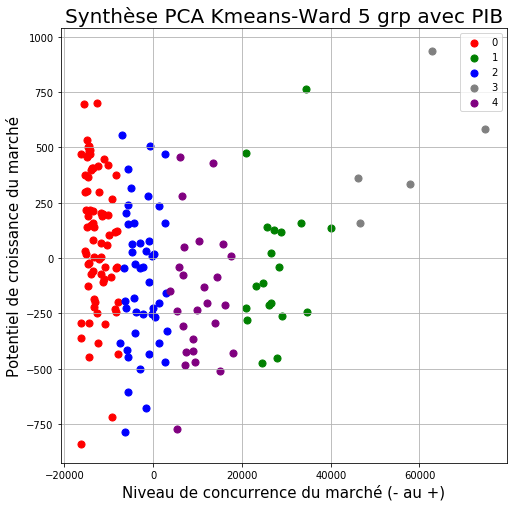

In [103]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Niveau de concurrence du marché (- au +)', fontsize = 15)
ax.set_ylabel("Potentiel de croissance du marché", fontsize = 15)
ax.set_title('Synthèse PCA Kmeans-Ward 5 grp avec PIB', fontsize = 20)

targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','grey','purple']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'principal component 1']
               , b.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Methode Kmeans ward 8 groupes

In [104]:
df_base_pib6 = df_base_pib.copy()

df_base_pib6.index = df_base_pib6['Pays']
del df_base_pib6['Pays']

In [105]:
acp = PCA(n_components=2).fit_transform(df_base_pib6.values)
df_acp = pd.DataFrame(data = acp, columns = ['principal component 1', 'principal component 2'])

In [106]:
df_base_pib6 = df_base_pib6.reset_index()
a = df_acp.join(df_base_pib6['Pays'])
b = a.join(df_base_with_centroid2['cluster ID'])

In [107]:
b.head(10)

,principal component 1,principal component 2,Pays,cluster ID
0,-14497.481394,508.604876,Afghanistan,5
1,-3851.637704,-242.572554,Afrique du Sud,0
2,-5789.949150,-444.736402,Albanie,0
3,-3039.486964,-501.569778,Algérie,3
4,26621.074362,-203.635792,Allemagne,1
5,-10120.692769,196.754463,Angola,0
6,2554.292572,470.732607,Antigua-et-Barbuda,3
7,33238.937158,158.216733,Arabie saoudite,1
8,3187.481464,-328.625517,Argentine,3
9,-8570.280455,-227.743916,Arménie,0


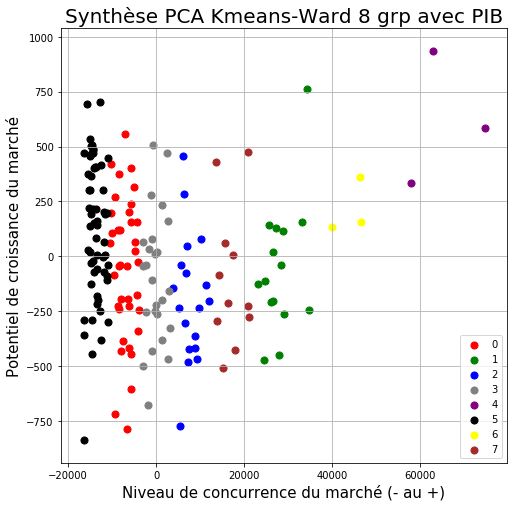

In [108]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Niveau de concurrence du marché (- au +)', fontsize = 15)
ax.set_ylabel("Potentiel de croissance du marché", fontsize = 15)
ax.set_title('Synthèse PCA Kmeans-Ward 8 grp avec PIB', fontsize = 20)

targets = [0,1,2,3,4,5,6,7]
colors = ['r', 'g', 'b','grey','purple','black','yellow','brown']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'principal component 1']
               , b.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Réaliser un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, choisissez-en une et testez son adéquation à une loi de votre choix

Ici les variables sont quantitatives continues (test de Kolmogorov Smirnov), nous choisirons la variable PIB par habitant

In [109]:
df_base_cah_group_pib = df_base_cah_group_pib.fillna(0)
df_base_cah_group_pib.head(10)

,Pays,PiB par habitant (PPA),groupe_cah,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,Afghanistan,1814.2,1,2.437552,2087.0,58.26,20.992104
1,Afrique du Sud,12445.6,5,0.744474,3020.0,85.33,42.646197
2,Albanie,10504.1,5,0.347881,3188.0,111.37,53.461435
3,Algérie,13253.2,5,1.886596,3293.0,91.92,27.241079
4,Allemagne,42914.5,3,-0.088164,3503.0,101.39,60.656870
5,Angola,6185.0,2,3.126651,2474.0,57.27,32.268203
6,Antigua-et-Barbuda,18862.8,2,1.123596,2416.0,83.49,68.391424
7,Arabie saoudite,49537.6,5,1.912472,3255.0,91.59,44.207883
8,Argentine,19482.2,5,0.873756,3226.0,102.60,65.233918
9,Arménie,7727.9,4,0.269451,2924.0,90.06,48.123473


In [110]:
ks_2samp(df_base_cah_group_pib["PiB par habitant (PPA)"],list(np.random.normal(np.mean(df_base_cah_group_pib["PiB par habitant (PPA)"]), np.std(df_base_cah_group_pib["PiB par habitant (PPA)"]), 1000)))

Ks_2sampResult(statistic=0.176, pvalue=0.00019393645316539618)

Conclusion : La quantité est très petite, on rejette H1 (F différent de F0) et on garde H0. La variable PIB par habitant suit la loi normale.

## Réaliser un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Trouvez une variable (parmi les 4 proposées ou une autre variable de votre choix) qui soit gaussienne sur ces 2 clusters (en réalisant un test d'adéquation), puis effectuez le test de comparaison.

In [111]:
cluster_1 = df_base_cah_group_pib[df_base_cah_group_pib['groupe_cah'] == 1]['PiB par habitant (PPA)']
cluster_2 = df_base_cah_group_pib[df_base_cah_group_pib['groupe_cah'] == 2]['PiB par habitant (PPA)']


On teste tout d’abord l’égalité des variances à l’aide de la commande :

In [112]:
bartlett(cluster_1,cluster_2)

BartlettResult(statistic=21.819950186918234, pvalue=2.9947005382663727e-06)

La p-valeur valant 2×10-06, on ne rejette donc pas l’égalité des variances au niveau de test 5%. Les deux échantillons n'ont pas la même loi.

On teste ensuite l’égalité des moyennes à l’aide de la commande :

In [113]:
ttest_ind(cluster_1,cluster_2, equal_var=True)

Ttest_indResult(statistic=-2.9185773710228204, pvalue=0.004537209471115001)

On obtient une p-valeur égale à environ 0.005. On constate donc que l’hypothèse d’égalité des moyennes entre cluster 1 et 2 de la variable PIB par habitants est (très facilement) rejetée à un niveau de test de 5%.

J'ai pu comparer mes deux clusters dans le cas gaussien car précédemment je me suis assuré que ma variable suivait une loi normale (gaussienne)